In [1]:
from google.colab import drive
drive.mount('/content/drive' , force_remount = True)

Mounted at /content/drive


In [2]:
pip install entropy-based-binning

In [3]:
pip install jenkspy

     |████████████████████████████████| 55 kB 2.1 MB/s 
  Created wheel for jenkspy: filename=jenkspy-0.2.0-cp37-cp37m-linux_x86_64.whl size=71238 sha256=5f372ae111c6f3ca96d9c0030d2dceb2f937fa7b7768a61baf37bbfb4750167a
  Stored in directory: /root/.cache/pip/wheels/d8/d1/42/9bd05164ef706b84674905892f0542f8db6ac4a652473ca7e0
Successfully built jenkspy


In [4]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import random
from tqdm import tqdm
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn import pipeline
from sklearn.feature_selection import SelectKBest, f_regression, f_classif, chi2, SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from scipy.stats import pearsonr
from sklearn.metrics import confusion_matrix, classification_report, silhouette_score
from sklearn.svm import SVR, LinearSVR, SVC, LinearSVC
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.kernel_approximation import Nystroem
from sklearn.linear_model import SGDClassifier, SGDRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from scipy import stats
from keras.layers import Dense
from keras.models import Sequential
import entropy_based_binning as ebb
from sklearn.metrics import plot_confusion_matrix, auc
from sklearn.impute import SimpleImputer
import math
from math import sqrt

# Exploring and making required data

## Selecting Required columns

In [ ]:
diff_pop_df = pickle.load(open('/content/drive/MyDrive/final_data/combined_data_final_different_population.pickle','rb'))
# diff_pop_df.dropna()
diff_pop_df = diff_pop_df.dropna()
diff_pop_df.head()

,BF_2011,FC_2011,MSW_2011,ASSET_2011,2001_cc_code,ADI_2011,BF_2001,FC_2001,MSW_2001,ASSET_2001,VILL_CODE_2001,DIST_CODE_2001,VILL_CODE_2011,DIST_CODE_2011,STATE_CODE_2001,STATE_CODE_2011,ADI_2001,distance_district_centre,dc_score_none_none_old,inverted_dist,inverted_dist_and_std_scalar,total_population_2001,total_population_2011,ADI_2019,ASSET_2019,MSW_2019,FC_2019,BF_2019,rate_of_population_growth_2001_to_2011,total_population_2019
2011_code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
27378,1,1,3,3,301000100000500,8,1.0,1.0,2.0,1.0,00000500,1,27378,35,3,3,5.0,6.111495,0.407427,0.163626,0.407427,766.0,852.0,7.0,2.0,3.0,1.0,1.0,0.112272,947.0
27379,1,1,3,3,301000100000600,8,1.0,1.0,1.0,2.0,00000600,1,27379,35,3,3,5.0,4.878376,0.658831,0.204986,0.658831,730.0,780.0,10.0,2.0,3.0,3.0,2.0,0.068493,833.0
27380,1,1,3,3,301000100000700,8,1.0,1.0,1.0,1.0,00000700,1,27380,35,3,3,4.0,9.103092,0.080571,0.109853,0.080571,2104.0,2502.0,7.0,2.0,3.0,1.0,1.0,0.189163,2975.0
27381,1,1,3,3,301000100000800,8,1.0,1.0,1.0,2.0,00000800,1,27381,35,3,3,5.0,6.777262,0.309724,0.147552,0.309724,3014.0,1887.0,11.0,2.0,3.0,3.0,3.0,-0.373922,1181.0
27382,1,1,3,3,301000100000900,8,1.0,1.0,2.0,2.0,00000900,1,27382,35,3,3,6.0,6.786058,0.308561,0.147361,0.308561,461.0,2233.0,10.0,2.0,3.0,3.0,2.0,3.843818,10816.0


In [ ]:
len(diff_pop_df)

308011

In [ ]:
reqd_df1 = diff_pop_df.loc[:, ['distance_district_centre', 'ADI_2001', 'ADI_2011', 'ADI_2019']]
reqd_df = reqd_df1.copy()
reqd_df.head()

,distance_district_centre,ADI_2001,ADI_2011,ADI_2019
2011_code,,,,
27378,6.111495,5.0,8,7.0
27379,4.878376,5.0,8,10.0
27380,9.103092,4.0,8,7.0
27381,6.777262,5.0,8,11.0
27382,6.786058,6.0,8,10.0


In [ ]:
# reqd_df.describe()

In [ ]:
reqd_df = reqd_df.dropna()

In [ ]:
reqd_df.describe()

,distance_district_centre,ADI_2001,ADI_2011,ADI_2019
count,308011.000000,308011.000000,308011.000000,308011.000000
mean,19.822446,6.468746,6.849067,6.695735
std,15.023494,1.778019,1.969146,1.598311
min,0.032332,4.000000,4.000000,4.000000
25%,9.047663,5.000000,5.000000,6.000000
50%,15.555848,6.000000,7.000000,7.000000
75%,26.508914,7.000000,8.000000,7.000000
max,112.079242,12.000000,12.000000,12.000000


In [ ]:
reqd_df[((reqd_df['ADI_2019'] >= reqd_df['ADI_2001']) & (reqd_df['ADI_2019'] >= reqd_df['ADI_2011'])) ]

,distance_district_centre,ADI_2001,ADI_2011,ADI_2019
2011_code,,,,
27379,4.878376,5.0,8,10.0
27381,6.777262,5.0,8,11.0
27382,6.786058,6.0,8,10.0
27384,7.862222,6.0,8,11.0
27385,8.429632,6.0,10,11.0
...,...,...,...,...
644351,14.755872,7.0,10,11.0
644353,8.398271,8.0,10,11.0
644432,4.140615,7.0,10,11.0


##Correlation Tests

In [ ]:
reqd_df['distance_district_centre'].corr(reqd_df['ADI_2019'])

-0.2685969301422599

In [ ]:
reqd_df.corr()

,distance_district_centre,ADI_2001,ADI_2011,ADI_2019
distance_district_centre,1.000000,-0.274163,-0.298941,-0.268597
ADI_2001,-0.274163,1.000000,0.477531,0.487154
ADI_2011,-0.298941,0.477531,1.000000,0.459487
ADI_2019,-0.268597,0.487154,0.459487,1.000000


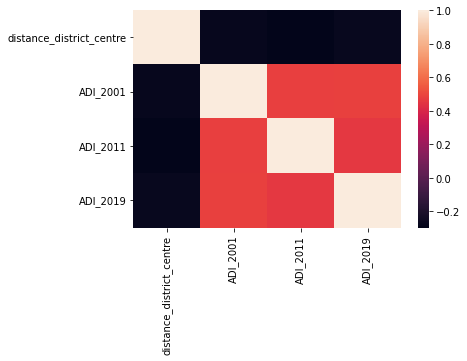

In [ ]:
data = pd.DataFrame(reqd_df.corr(), columns=reqd_df.columns, index = reqd_df.corr().index)

# plot heatmap
ax = sns.heatmap(data.T)

# turn the axis label
for item in ax.get_yticklabels():
    item.set_rotation(0)

for item in ax.get_xticklabels():
    item.set_rotation(90)

# save figure
plt.savefig('seabornPandas.png', dpi=100)
plt.show()

In [ ]:
# A = np.random.randint(0, 5, size=(10, 100))
# B = ebb.bin_array(A, nbins=3, axis=1)
# b = ebb.bin_sequence(A[0], nbins=3)
# b

# D = np.random.choice(np.linspace(0., 1., 11), size=(10, 100))
# _, A = np.unique(D, return_inverse=True)
# A = A.reshape(D.shape)
# B = ebb.bin_array(A, nbins=3, axis=1)
# B

In [ ]:
reqd_df[reqd_df['distance_district_centre'] <= 10].describe()

,distance_district_centre,ADI_2001,ADI_2011,ADI_2019
count,89297.000000,89297.000000,89297.000000,89297.000000
mean,6.270028,7.071055,7.588060,7.235036
std,2.354136,1.937943,2.040257,1.798226
min,0.032332,4.000000,4.000000,4.000000
25%,4.479389,6.000000,6.000000,6.000000
50%,6.476386,7.000000,7.000000,7.000000
75%,8.268577,8.000000,9.000000,8.000000
max,9.999985,12.000000,12.000000,12.000000


In [ ]:
# x = [5, 9, 19, 50]
# y = [12, 9, 6, 4]
# plt.errorbar(x, y, [1, 2, 0.5, 0],marker='s', mfc='red',
#          mec='green', ms=20, mew=4)


## Binning Distance from district center using natural breaks (jenks_breaks)

In [ ]:
import jenkspy
breaks = jenkspy.jenks_breaks(reqd_df['distance_district_centre'], nb_class=3)

In [ ]:
breaks

[0.03233235455931745, 18.8769007814407, 40.74708322038582, 112.07924174309929]

In [ ]:
reqd_df['dist_break'] = pd.cut(reqd_df['distance_district_centre'] , bins=breaks, labels=[1,2,3], include_lowest=True)

In [ ]:
reqd_df[reqd_df['dist_break'] == 1].describe()

,distance_district_centre,ADI_2001,ADI_2011,ADI_2019
count,183689.000000,183689.000000,183689.000000,183689.000000
mean,10.280491,6.841841,7.282445,7.011775
std,4.603376,1.849483,1.961122,1.689124
min,0.032332,4.000000,4.000000,4.000000
25%,6.585570,6.000000,6.000000,6.000000
50%,10.197840,6.000000,7.000000,7.000000
75%,14.007650,8.000000,8.000000,8.000000
max,18.876901,12.000000,12.000000,12.000000


In [ ]:
reqd_df[reqd_df['dist_break'] == 2].describe()

,distance_district_centre,ADI_2001,ADI_2011,ADI_2019
count,94130.000000,94130.000000,94130.000000,94130.000000
mean,27.473863,6.026995,6.333656,6.330267
std,6.067767,1.542585,1.763214,1.322968
min,18.877325,4.000000,4.000000,4.000000
25%,22.197077,5.000000,5.000000,5.000000
50%,26.461367,6.000000,6.000000,6.000000
75%,32.102948,7.000000,7.000000,7.000000
max,40.747083,12.000000,12.000000,12.000000


In [ ]:
reqd_df[reqd_df['dist_break'] == 3].describe()

,distance_district_centre,ADI_2001,ADI_2011,ADI_2019
count,30192.000000,30192.000000,30192.000000,30192.000000
mean,54.021052,5.576080,5.819290,5.912361
std,12.363670,1.330229,1.853268,1.268213
min,40.747966,4.000000,4.000000,4.000000
25%,44.850284,5.000000,5.000000,5.000000
50%,50.432657,5.000000,5.000000,6.000000
75%,59.256220,6.000000,7.000000,7.000000
max,112.079242,12.000000,12.000000,12.000000


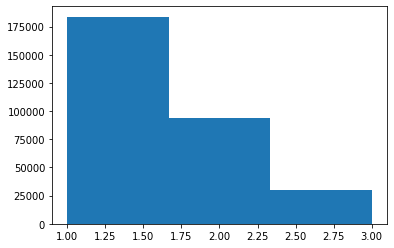

In [ ]:
plt.hist(reqd_df['dist_break'], bins=3)
plt.show()

In [ ]:
reqd_df1 = reqd_df1.dropna()
len(reqd_df1)

308011

In [ ]:
# reqd_df1.info()

In [ ]:
reqd_df2 = reqd_df1[reqd_df1['ADI_2001'] == 4]
tot_vill_percent = len(reqd_df2)

In [ ]:
count_vill_dist_list = []
t = 10
for i in range(0, 113, 10):
  length = len(reqd_df2[(reqd_df2['distance_district_centre'] >= t-10) & (reqd_df2['distance_district_centre'] < t)])
  count_vill_dist_list.append(length/tot_vill_percent)
  t+=10

In [ ]:
dist_range_list = list(range(1, 13))

In [ ]:
print(len(count_vill_dist_list), len(dist_range_list))

12 12


<BarContainer object of 12 artists>

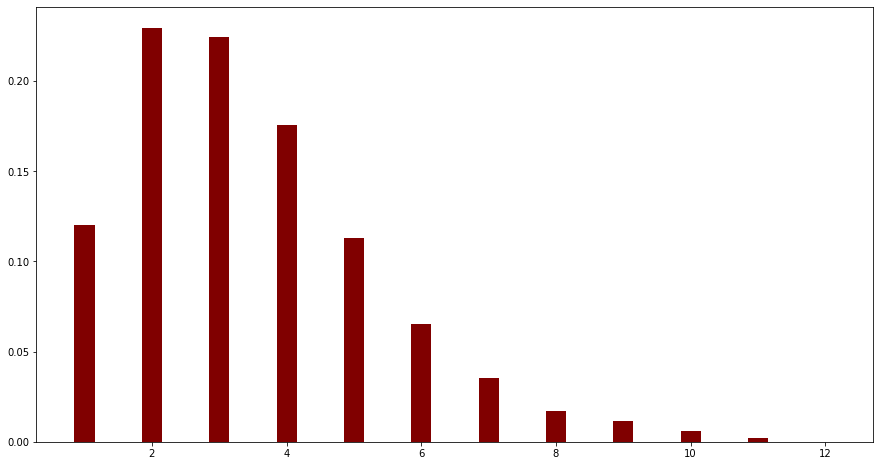

In [ ]:
fig = plt.figure(figsize = (15, 8))
 
# creating the bar plot
plt.bar(dist_range_list, count_vill_dist_list, color ='maroon', width = 0.3)

## Binning Distance from district center using kmeans

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
X = np.array(list(zip(reqd_df1['distance_district_centre'], [0]*len(reqd_df1)))).reshape(len(reqd_df1), 2)
for k in K:
    # Building and fitting the model
    # X = reqd_df1['distance_district_centre']
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
 
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

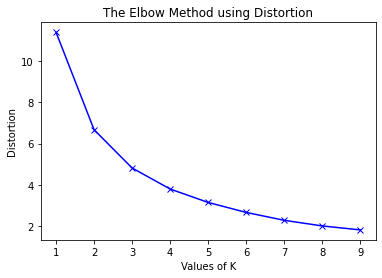

In [ ]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

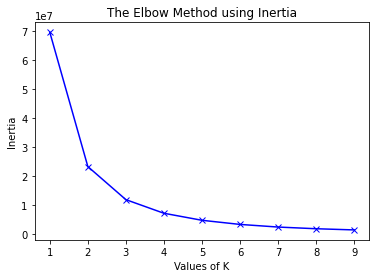

In [ ]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

## Plots for ADI and Change in ADI vs Distance

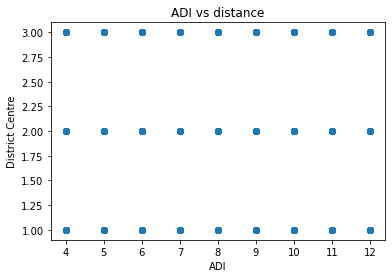

In [ ]:
plt.scatter(np.array(reqd_df['ADI_2001']), np.array(reqd_df['dist_break']))
plt.xlabel('ADI')
plt.ylabel('District Centre')
plt.title('ADI vs distance')
plt.show()

In [ ]:
reqd_df['dist_break']

2011_code
27378     1
27379     1
27380     1
27381     1
27382     1
         ..
644661    1
644682    1
644683    1
644687    1
644693    1
Name: dist_break, Length: 308011, dtype: category
Categories (3, int64): [1 < 2 < 3]

In [ ]:
def stats(reqd_df1, year, adi_list, change = 0, year2 = '2011') :
  mean_dist = []
  dev_dist = []
  count_lis = []

  if change == 0:
    plot_col = 'ADI_'+year
  else:
    plot_col = 'change_'+year+'_'+year2

  for adi in adi_list:
    temp_df = reqd_df1[reqd_df1[plot_col] == adi]
    mean_dist.append(temp_df['distance_district_centre'].mean())
    dev_dist.append(temp_df['distance_district_centre'].std())
    count_lis.append(len(temp_df))

  return (mean_dist, dev_dist, count_lis)

In [ ]:
def plot_ADI_vs_Distance(mean_distance, dev_distance, year, adi_list, change = 0, year2 = '2011') : 
  fig = plt.figure(figsize = (15, 8))
  x = mean_distance
  y = list(adi_list)
  
  if change == 0:
    y_label = 'ADI '+year
  else:
    y_label = 'change in ADI form '+year+' to '+year2

  plt.errorbar(x, y, xerr = dev_distance, marker='s', mfc='red',
          mec='green', ms=10, mew=1)

  plt.xlabel('Distance from district centre')
  plt.ylabel(y_label)
  plt.title('Distance from district vs ' + y_label)
  plt.show()

In [ ]:
def final_plot_return(reqd_df1, year, adi_list, change=0, year2='2011') : 
  mean_distance, dev_distance, tot_count = stats(reqd_df1, year, adi_list, change, year2)
  plot_ADI_vs_Distance(mean_distance, dev_distance, year, adi_list, change, year2)

<font size=5 color="blue">Plots for 3 different years (Distance vs ADI)</font>

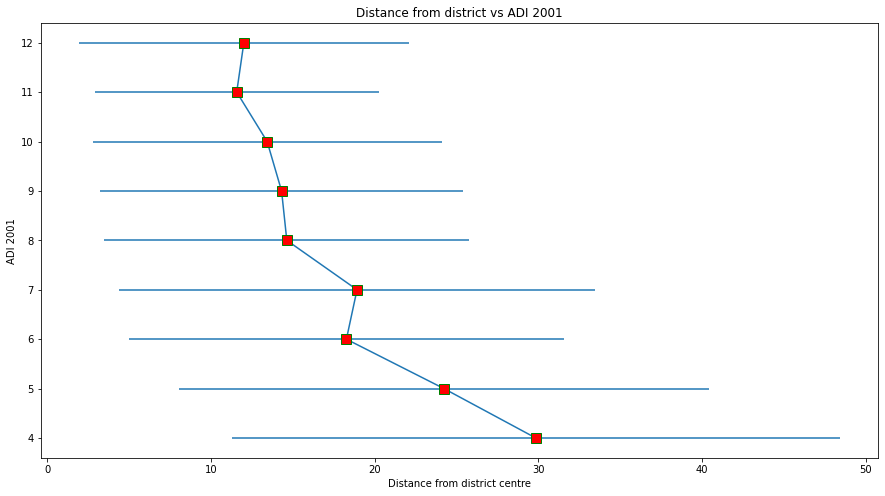

In [ ]:
adi_list = [4, 5, 6, 7, 8, 9, 10, 11, 12]
final_plot_return(reqd_df1, '2001', adi_list)

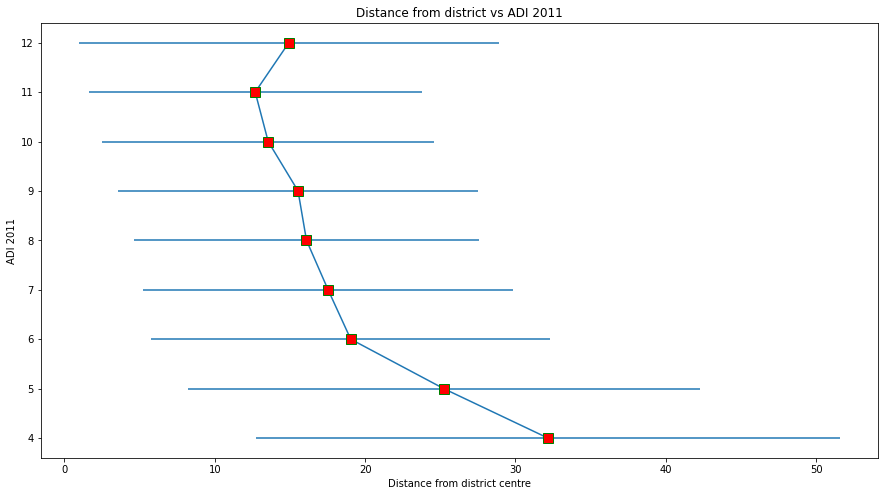

In [ ]:
final_plot_return(reqd_df1, '2011', adi_list)

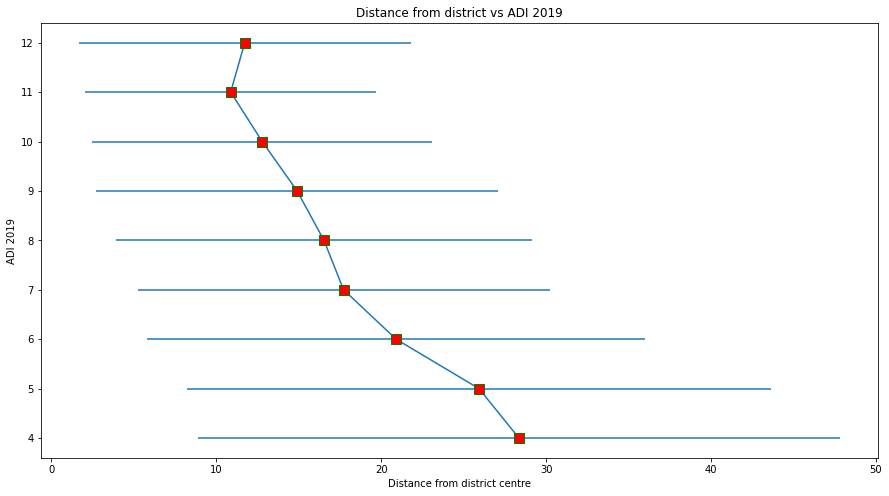

In [ ]:
final_plot_return(reqd_df1, '2019', adi_list)

<font size=5 color="blue">Plots for 2 year ranges (Distance vs Change in ADI)</font>

In [ ]:
reqd_df1['change_2001_2011'] = reqd_df1['ADI_2011'] - reqd_df1['ADI_2001']
reqd_df1['change_2011_2019'] = reqd_df1['ADI_2019'] - reqd_df1['ADI_2011']

In [ ]:
adi_list = [i for i in range(-8, 9)]
adi_list

[-8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]

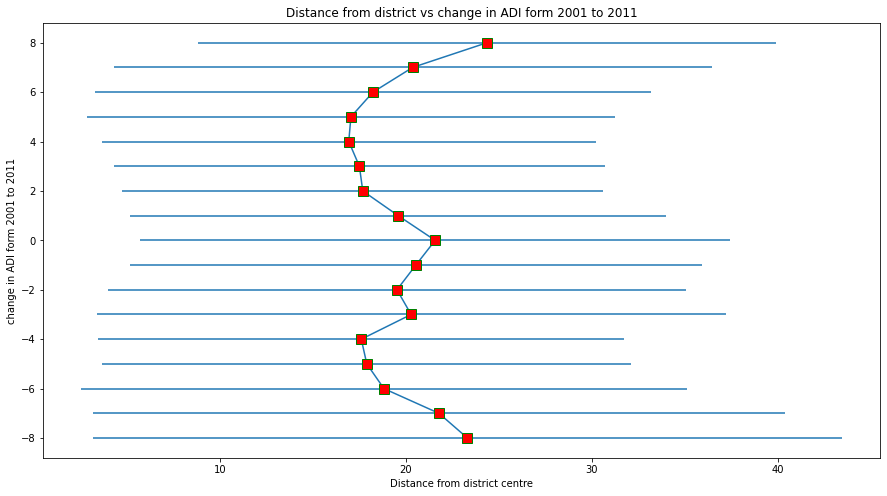

In [ ]:
final_plot_return(reqd_df1, '2001', adi_list, change=1, year2='2011')

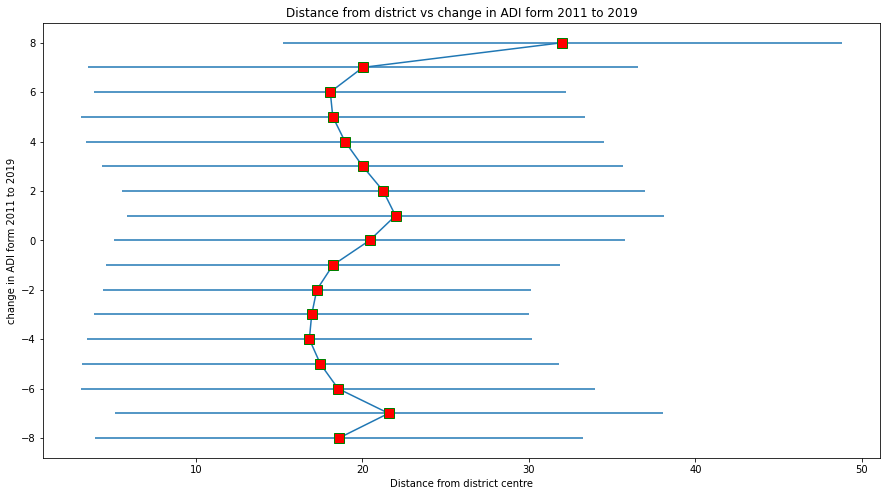

In [ ]:
final_plot_return(reqd_df1, '2011', adi_list, change=1, year2='2019')

In [ ]:
reqd_df1[reqd_df1['change_2001_2011'] == 8].describe()

,distance_district_centre,ADI_2001,ADI_2011,ADI_2019,change_2001_2011,change_2011_2019
count,184.000000,184.0,184.0,184.000000,184.0,184.000000
mean,24.364015,4.0,12.0,6.586957,8.0,-5.413043
std,15.566429,0.0,0.0,1.802561,0.0,1.802561
min,1.172556,4.0,12.0,4.000000,8.0,-8.000000
25%,11.937983,4.0,12.0,5.000000,8.0,-7.000000
50%,20.637932,4.0,12.0,6.000000,8.0,-6.000000
75%,36.793351,4.0,12.0,7.000000,8.0,-5.000000
max,63.600176,4.0,12.0,12.000000,8.0,0.000000


In [ ]:
reqd_df1[reqd_df1['ADI_2001'] == 12].describe()

,distance_district_centre,ADI_2001,ADI_2011,ADI_2019,change_2001_2011,change_2011_2019
count,7383.000000,7383.0,7383.000000,7383.000000,7383.000000,7383.000000
mean,12.017667,12.0,9.881484,9.265881,-2.118516,-0.615603
std,10.066255,0.0,2.001466,2.031487,2.001466,2.167938
min,0.034463,12.0,4.000000,4.000000,-8.000000,-8.000000
25%,5.571706,12.0,9.000000,7.000000,-3.000000,-2.000000
50%,9.373785,12.0,11.000000,10.000000,-1.000000,0.000000
75%,14.866146,12.0,11.000000,11.000000,-1.000000,1.000000
max,88.488354,12.0,12.000000,12.000000,0.000000,7.000000


#DISTRICT LEVEL ANALYSIS

In [ ]:
district_diff_pop_df = pickle.load(open('/content/drive/MyDrive/final_data/combined_data_final_different_population.pickle','rb'))
district_diff_pop_df.head()

,BF_2011,FC_2011,MSW_2011,ASSET_2011,2001_cc_code,ADI_2011,BF_2001,FC_2001,MSW_2001,ASSET_2001,VILL_CODE_2001,DIST_CODE_2001,VILL_CODE_2011,DIST_CODE_2011,STATE_CODE_2001,STATE_CODE_2011,ADI_2001,distance_district_centre,dc_score_none_none_old,inverted_dist,inverted_dist_and_std_scalar,total_population_2001,total_population_2011,ADI_2019,ASSET_2019,MSW_2019,FC_2019,BF_2019,rate_of_population_growth_2001_to_2011,total_population_2019
2011_code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
27378,1,1,3,3,301000100000500,8,1.0,1.0,2.0,1.0,00000500,1,27378,35,3,3,5.0,6.111495,0.407427,0.163626,0.407427,766.0,852.0,7.0,2.0,3.0,1.0,1.0,0.112272,947.0
27379,1,1,3,3,301000100000600,8,1.0,1.0,1.0,2.0,00000600,1,27379,35,3,3,5.0,4.878376,0.658831,0.204986,0.658831,730.0,780.0,10.0,2.0,3.0,3.0,2.0,0.068493,833.0
27380,1,1,3,3,301000100000700,8,1.0,1.0,1.0,1.0,00000700,1,27380,35,3,3,4.0,9.103092,0.080571,0.109853,0.080571,2104.0,2502.0,7.0,2.0,3.0,1.0,1.0,0.189163,2975.0
27381,1,1,3,3,301000100000800,8,1.0,1.0,1.0,2.0,00000800,1,27381,35,3,3,5.0,6.777262,0.309724,0.147552,0.309724,3014.0,1887.0,11.0,2.0,3.0,3.0,3.0,-0.373922,1181.0
27382,1,1,3,3,301000100000900,8,1.0,1.0,2.0,2.0,00000900,1,27382,35,3,3,6.0,6.786058,0.308561,0.147361,0.308561,461.0,2233.0,10.0,2.0,3.0,3.0,2.0,3.843818,10816.0


In [ ]:
district_diff_pop_df.columns

Index(['BF_2011', 'FC_2011', 'MSW_2011', 'ASSET_2011', '2001_cc_code',
       'ADI_2011', 'BF_2001', 'FC_2001', 'MSW_2001', 'ASSET_2001',
       'VILL_CODE_2001', 'DIST_CODE_2001', 'VILL_CODE_2011', 'DIST_CODE_2011',
       'STATE_CODE_2001', 'STATE_CODE_2011', 'ADI_2001',
       'distance_district_centre', 'dc_score_none_none_old', 'inverted_dist',
       'inverted_dist_and_std_scalar', 'total_population_2001',
       'total_population_2011', 'ADI_2019', 'ASSET_2019', 'MSW_2019',
       'FC_2019', 'BF_2019', 'rate_of_population_growth_2001_to_2011',
       'total_population_2019'],
      dtype='object')

In [ ]:
district_reqd_df1 = diff_pop_df.loc[:, ['STATE_CODE_2011', 'DIST_CODE_2011', 'distance_district_centre', 'ADI_2001', 'ADI_2011', 'ADI_2019']]
district_reqd_df = district_reqd_df1.copy()
district_reqd_df.head()

,STATE_CODE_2011,DIST_CODE_2011,distance_district_centre,ADI_2001,ADI_2011,ADI_2019
2011_code,,,,,,
27378,3,35,6.111495,5.0,8,7.0
27379,3,35,4.878376,5.0,8,10.0
27380,3,35,9.103092,4.0,8,7.0
27381,3,35,6.777262,5.0,8,11.0
27382,3,35,6.786058,6.0,8,10.0


In [ ]:
dist1 = district_reqd_df[district_reqd_df['DIST_CODE_2011'] == 36]
dist1 = dist1.dropna()
dist1.describe()

,distance_district_centre,ADI_2001,ADI_2011,ADI_2019
count,556.000000,556.000000,556.000000,556.000000
mean,7.071761,10.863309,10.589928,10.568345
std,3.808868,1.355411,1.249507,1.103967
min,0.299644,5.000000,5.000000,5.000000
25%,4.124084,10.000000,10.000000,10.000000
50%,6.788133,11.000000,11.000000,11.000000
75%,9.161005,12.000000,11.000000,11.000000
max,18.321795,12.000000,12.000000,12.000000


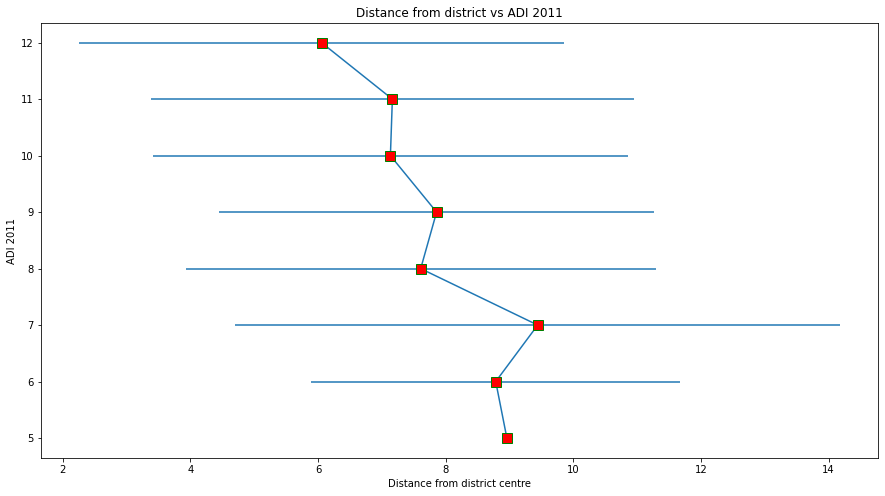

In [ ]:
adi_list = sorted(set(dist1['ADI_2011']))
final_plot_return(dist1, '2011', adi_list)

In [ ]:
dist1['change_2001_2011'] = dist1['ADI_2011'] - dist1['ADI_2001']
dist1['change_2011_2019'] = dist1['ADI_2019'] - dist1['ADI_2011']
adi_list = sorted(set(dist1['change_2001_2011']))

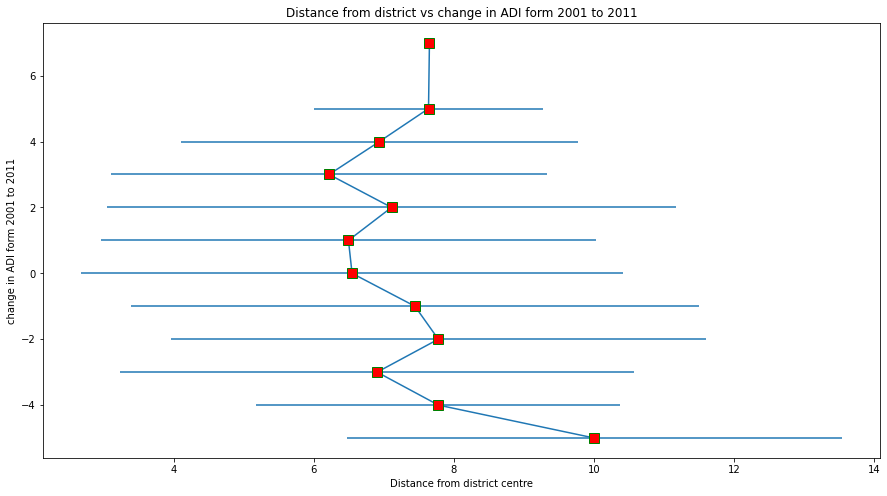

In [ ]:
final_plot_return(dist1, '2001', adi_list, change=1, year2='2011')

In [ ]:
dist1.describe()

,distance_district_centre,ADI_2001,ADI_2011,ADI_2019,change_2001_2011,change_2011_2019
count,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000
mean,7.071761,10.863309,10.589928,10.568345,-0.273381,-0.021583
std,3.808868,1.355411,1.249507,1.103967,1.756556,1.504193
min,0.299644,5.000000,5.000000,5.000000,-5.000000,-6.000000
25%,4.124084,10.000000,10.000000,10.000000,-1.000000,-1.000000
50%,6.788133,11.000000,11.000000,11.000000,0.000000,0.000000
75%,9.161005,12.000000,11.000000,11.000000,1.000000,1.000000
max,18.321795,12.000000,12.000000,12.000000,7.000000,6.000000


#New Analysis

In [ ]:
pop_df = pickle.load(open('/content/drive/MyDrive/final_data/combined_data_final_different_population.pickle','rb'))
pop_df.head()

,BF_2011,FC_2011,MSW_2011,ASSET_2011,2001_cc_code,ADI_2011,BF_2001,FC_2001,MSW_2001,ASSET_2001,VILL_CODE_2001,DIST_CODE_2001,VILL_CODE_2011,DIST_CODE_2011,STATE_CODE_2001,STATE_CODE_2011,ADI_2001,distance_district_centre,dc_score_none_none_old,inverted_dist,inverted_dist_and_std_scalar,total_population_2001,total_population_2011,ADI_2019,ASSET_2019,MSW_2019,FC_2019,BF_2019,rate_of_population_growth_2001_to_2011,total_population_2019
2011_code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
27378,1,1,3,3,301000100000500,8,1.0,1.0,2.0,1.0,00000500,1,27378,35,3,3,5.0,6.111495,0.407427,0.163626,0.407427,766.0,852.0,7.0,2.0,3.0,1.0,1.0,0.112272,947.0
27379,1,1,3,3,301000100000600,8,1.0,1.0,1.0,2.0,00000600,1,27379,35,3,3,5.0,4.878376,0.658831,0.204986,0.658831,730.0,780.0,10.0,2.0,3.0,3.0,2.0,0.068493,833.0
27380,1,1,3,3,301000100000700,8,1.0,1.0,1.0,1.0,00000700,1,27380,35,3,3,4.0,9.103092,0.080571,0.109853,0.080571,2104.0,2502.0,7.0,2.0,3.0,1.0,1.0,0.189163,2975.0
27381,1,1,3,3,301000100000800,8,1.0,1.0,1.0,2.0,00000800,1,27381,35,3,3,5.0,6.777262,0.309724,0.147552,0.309724,3014.0,1887.0,11.0,2.0,3.0,3.0,3.0,-0.373922,1181.0
27382,1,1,3,3,301000100000900,8,1.0,1.0,2.0,2.0,00000900,1,27382,35,3,3,6.0,6.786058,0.308561,0.147361,0.308561,461.0,2233.0,10.0,2.0,3.0,3.0,2.0,3.843818,10816.0


In [ ]:
df = pop_df.loc[:, ['STATE_CODE_2011', 'DIST_CODE_2011', 'distance_district_centre', 'ADI_2001', 'ADI_2011', 'ADI_2019']]
df = df.dropna()
df1 = df.copy()
df1.head()
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 326332 entries, 27378 to 644693
Data columns (total 6 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   STATE_CODE_2011           326332 non-null  object 
 1   DIST_CODE_2011            326332 non-null  object 
 2   distance_district_centre  326332 non-null  float64
 3   ADI_2001                  326332 non-null  float64
 4   ADI_2011                  326332 non-null  int64  
 5   ADI_2019                  326332 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 17.4+ MB
None


In [ ]:
def adi_count_table(df, year, dist_range, equal = 0, change = 0, year2 = 2011, index_values = list(range(4, 13))):
  final_count_list = []
  final_percent_list = []
  mean_list = []
  std_dev_list = []
  vill_count = []
  index_values = sorted(list(index_values))

  for adi in index_values :
    adi_count_list = []
    adi_percent_list = []
    col_name = ''
    if change == 0:
      col_name = 'ADI_'+year
    else:
      col_name = 'change_'+year+'_'+year2
    temp = df[df[col_name] == adi]
    mean_list.append(round(temp['distance_district_centre'].mean(), 2))
    std_dev_list.append(round(temp['distance_district_centre'].std(), 2))
    tot_villages = len(temp)
    vill_count.append(tot_villages)
    if equal == 0 :
      for ele in dist_range:
        start_dist = ele[0]
        spread = ele[1]
        length = len(temp[(temp['distance_district_centre'] >= start_dist) & (temp['distance_district_centre'] < start_dist + spread)])

        if length != 0 :
          adi_count_list.append(length)
          adi_percent_list.append(round(length/tot_villages,2))

        else:
          adi_count_list.append(0)
          adi_percent_list.append(0)


    else :
      t = equal
      for i in range(0, 113, equal):
        length = len(temp[(temp['distance_district_centre'] >= t-equal) & (temp['distance_district_centre'] < t)])

        if length != 0 :
          adi_count_list.append(length)
          adi_percent_list.append(round(length/tot_villages, 2))

        else:
          adi_count_list.append(0)
          adi_percent_list.append(0)

        t+=equal

    final_count_list.append(adi_count_list)
    final_percent_list.append(adi_percent_list)

  return final_count_list, final_percent_list, mean_list, std_dev_list, vill_count

In [ ]:
def return_df(list_2d, dist_range, mean_list, std_dev_list, equal = 0, vill_count_list = [], index_values = list(range(4, 13))) :
  column_values = []
  if equal == 0:
    for ele in dist_range:
      column_values.append(str(ele[0])+' to ' + str(ele[0]+ele[1]))
  else :
    for i in range(0, 113, equal):
      column_values.append(str(i) + ' to ' + str(i+equal))
  index_values = sorted(list(index_values))
  # creating the dataframe
  final_df = pd.DataFrame(data = np.array(list_2d), index = index_values, columns = column_values)
  final_df['Mean (distances)'] = mean_list
  final_df['std dev'] = std_dev_list
  if len(vill_count_list) != 0:
    final_df['Total Villages'] = vill_count_list


  return final_df  

In [ ]:
equal = 20
count_list, percent_list, mean_list, std_dev_list, vill_count_list = adi_count_table(df, '2001', [], equal = equal)
percent_df_2001 = return_df(percent_list, [],  mean_list, std_dev_list, equal=equal, vill_count_list=vill_count_list)
percent_df_2001

,0 to 20,20 to 40,40 to 60,60 to 80,80 to 100,100 to 120,Mean (distances),std dev,Total Villages
4,0.36,0.40,0.18,0.05,0.02,0.0,29.43,18.29,28476
5,0.49,0.36,0.12,0.03,0.01,0.0,24.06,15.96,81376
6,0.66,0.26,0.06,0.01,0.00,0.0,18.30,13.25,88425
7,0.66,0.25,0.07,0.02,0.00,0.0,18.96,14.49,59367
8,0.77,0.19,0.03,0.01,0.00,0.0,14.74,11.26,32584
9,0.79,0.18,0.03,0.00,0.00,0.0,14.37,11.21,11933
10,0.81,0.16,0.02,0.01,0.00,0.0,13.41,10.73,9088
11,0.88,0.11,0.01,0.00,0.00,0.0,11.43,8.73,7267
12,0.86,0.12,0.02,0.00,0.00,0.0,11.77,9.94,7816


In [ ]:
# dist_range = [(0, 19), (19, 22), (41, 72)]
# dist_range = [(0, 11,1), (11.1, 10.6), (21.7, 91.3)]
# 9.1, 15.7, 26.6
dist_range = [(0, 9.1), (9.1, 6.6), (15.7, 10.9), (26.6, 86.4)]
count_list, percent_list, mean_list, std_dev_list, vill_count_list = adi_count_table(df, '2001', dist_range)
percent_df_2001 = return_df(percent_list, dist_range,  mean_list, std_dev_list)
percent_df_2001

NameError: ignored

In [ ]:
# 113-21.7

In [ ]:
equal = 20
count_list, percent_list, mean_list, std_dev_list, vill_count_list = adi_count_table(df, '2011', [], equal = equal)
# percent_df_2011 = return_df(percent_list, [],  mean_list, std_dev_list, equal = equal, vill_count_list=vill_count_list)
percent_df_2011 = return_df(percent_list, [],  mean_list, std_dev_list, equal = equal)
percent_df_2011

,0 to 20,20 to 40,40 to 60,60 to 80,80 to 100,100 to 120,Mean (distances),std dev
4,0.31,0.40,0.20,0.06,0.02,0.0,31.74,19.01
5,0.47,0.37,0.12,0.03,0.01,0.0,25.01,16.74
6,0.63,0.29,0.07,0.01,0.00,0.0,19.04,13.20
7,0.69,0.25,0.05,0.01,0.00,0.0,17.53,12.29
8,0.73,0.22,0.04,0.00,0.00,0.0,16.09,11.48
9,0.76,0.19,0.04,0.01,0.00,0.0,15.49,11.92
10,0.81,0.15,0.03,0.00,0.00,0.0,13.44,11.00
11,0.84,0.12,0.03,0.00,0.00,0.0,12.42,10.95
12,0.78,0.14,0.07,0.01,0.00,0.0,14.57,13.83


In [ ]:
# dist_range = [(0, 19), (19, 22), (41, 72)]
# dist_range = [(0, 11,1), (11.1, 10.6), (21.7, 91.3)]
dist_range = [(0, 9.1), (9.1, 6.6), (15.7, 10.9), (26.6, 86.4)]

count_list, percent_list, mean_list, std_dev_list, vill_count_list = adi_count_table(df, '2011', dist_range)
percent_df_2011 = return_df(percent_list, dist_range,  mean_list, std_dev_list)
percent_df_2011

,0 to 9.1,9.1 to 15.7,15.7 to 26.6,26.6 to 113.0,Mean (distances),std dev
4,0.08,0.13,0.24,0.54,31.74,19.01
5,0.15,0.19,0.28,0.38,25.01,16.74
6,0.23,0.27,0.28,0.22,19.04,13.20
7,0.26,0.29,0.26,0.19,17.53,12.29
8,0.30,0.30,0.24,0.15,16.09,11.48
9,0.34,0.30,0.21,0.14,15.49,11.92
10,0.44,0.28,0.17,0.11,13.44,11.00
11,0.50,0.26,0.14,0.10,12.42,10.95
12,0.48,0.23,0.14,0.16,14.57,13.83


In [ ]:
equal = 20
count_list, percent_list, mean_list, std_dev_list, vill_count_list = adi_count_table(df, '2019', [], equal = equal)
# percent_df_2019 = return_df(percent_list, [],  mean_list, std_dev_list, equal=equal, vill_count_list=vill_count_list)
percent_df_2019 = return_df(percent_list, [],  mean_list, std_dev_list, equal=equal)
percent_df_2019

,0 to 20,20 to 40,40 to 60,60 to 80,80 to 100,100 to 120,Mean (distances),std dev
4,0.41,0.35,0.16,0.06,0.01,0.0,28.43,19.08
5,0.46,0.35,0.14,0.04,0.01,0.0,25.86,17.52
6,0.58,0.30,0.09,0.02,0.01,0.0,20.95,15.01
7,0.67,0.27,0.05,0.01,0.00,0.0,17.76,12.47
8,0.72,0.22,0.05,0.01,0.00,0.0,16.65,12.62
9,0.78,0.17,0.04,0.01,0.00,0.0,14.89,12.21
10,0.84,0.13,0.03,0.00,0.00,0.0,12.71,10.29
11,0.90,0.09,0.01,0.00,0.00,0.0,10.64,8.72
12,0.88,0.09,0.03,0.00,0.00,0.0,11.38,9.92


In [ ]:
# dist_range = [(0, 19), (19, 22), (41, 72)]
# dist_range = [(0, 11,1), (11.1, 10.6), (21.7, 91.3)]
dist_range = [(0, 9.1), (9.1, 6.6), (15.7, 10.9), (26.6, 86.4)]

count_list, percent_list, mean_list, std_dev_list, vill_count_list = adi_count_table(df, '2019', dist_range)
percent_df_2019 = return_df(percent_list, dist_range,  mean_list, std_dev_list)
percent_df_2019

,0 to 9.1,9.1 to 15.7,15.7 to 26.6,26.6 to 113.0,Mean (distances),std dev
4,0.13,0.16,0.26,0.44,28.43,19.08
5,0.15,0.19,0.26,0.40,25.86,17.52
6,0.22,0.25,0.25,0.28,20.95,15.01
7,0.26,0.28,0.27,0.19,17.76,12.47
8,0.31,0.29,0.24,0.17,16.65,12.62
9,0.38,0.29,0.20,0.13,14.89,12.21
10,0.45,0.30,0.16,0.09,12.71,10.29
11,0.55,0.28,0.12,0.05,10.64,8.72
12,0.52,0.27,0.15,0.06,11.38,9.92


In [ ]:
df1['change_2001_2011'] = df1['ADI_2011'] - df1['ADI_2001']
df1['change_2011_2019'] = df1['ADI_2019'] - df1['ADI_2011']

In [ ]:
positive_change_df = df1.copy()
positive_change_df = positive_change_df[positive_change_df['change_2001_2011'].gt(0) & positive_change_df['change_2011_2019'].gt(0)]
# reqd_df[((reqd_df['ADI_2019'] >= reqd_df['ADI_2001']) & (reqd_df['ADI_2019'] >= reqd_df['ADI_2011'])) ]
# positive_change_df

In [ ]:
len(positive_change_df)

21380

In [ ]:
set(positive_change_df['change_2001_2011'])

{1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0}

In [ ]:
equal = 20
change = 1
year = '2001'
year2 = '2011'
col_name = 'change_'+year+'_'+year2
index_values = set(positive_change_df[col_name])

count_list, percent_list, mean_list, std_dev_list, vill_count_list = adi_count_table(positive_change_df, year, [], equal = equal, change = change, year2 = year2, index_values = index_values)
positive_change_percent_df_2001_2011 = return_df(percent_list, [],  mean_list, std_dev_list, equal = equal, index_values = index_values)
positive_change_percent_df_2001_2011

,0 to 20,20 to 40,40 to 60,60 to 80,80 to 100,100 to 120,Mean (distances),std dev
0.0,0.54,0.32,0.11,0.03,0.01,0.0,22.67,16.09
1.0,0.60,0.30,0.08,0.02,0.00,0.0,20.44,14.87
2.0,0.68,0.25,0.06,0.01,0.00,0.0,17.54,12.82
3.0,0.75,0.19,0.06,0.01,0.00,0.0,15.63,12.76
4.0,0.81,0.12,0.06,0.00,0.00,0.0,13.81,12.52
5.0,0.79,0.14,0.05,0.01,0.00,0.0,13.83,13.06
6.0,0.80,0.13,0.07,0.00,0.00,0.0,13.09,12.40
7.0,0.84,0.11,0.05,0.00,0.00,0.0,13.37,12.45
8.0,1.00,0.00,0.00,0.00,0.00,0.0,11.78,8.97


In [ ]:
equal = 0
change = 1
year = '2001'
year2 = '2011'
col_name = 'change_'+year+'_'+year2
index_values = set(positive_change_df[col_name])
# dist_range = [(0, 19), (19, 22), (41, 72)]
# dist_range = [(0, 11,1), (11.1, 10.6), (21.7, 91.3)]
dist_range = [(0, 9.1), (9.1, 6.6), (15.7, 10.9), (26.6, 86.4)]


count_list, percent_list, mean_list, std_dev_list, vill_count_list = adi_count_table(positive_change_df, year, dist_range, equal = equal, change = change, year2 = year2, index_values = index_values)
positive_change_percent_df_2001_2011 = return_df(percent_list, dist_range,  mean_list, std_dev_list, equal = equal, index_values = index_values, vill_count_list=vill_count_list)
positive_change_percent_df_2001_2011

,0 to 9.1,9.1 to 15.7,15.7 to 26.6,26.6 to 113.0,Mean (distances),std dev,Total Villages
1.0,0.24,0.24,0.26,0.26,20.24,14.89,15391
2.0,0.34,0.28,0.21,0.18,16.44,12.83,4143
3.0,0.42,0.27,0.16,0.15,14.99,13.02,1277
4.0,0.45,0.25,0.18,0.13,14.68,13.80,433
5.0,0.38,0.23,0.26,0.12,15.37,12.94,112
6.0,0.43,0.22,0.17,0.17,15.64,15.03,23
7.0,0.00,1.00,0.00,0.00,11.80,NaN,1


In [ ]:
equal = 20
change = 1
year = '2001'
year2 = '2011'
col_name = 'change_'+year+'_'+year2
index_values = set(positive_change_df[col_name])

count_list, percent_list, mean_list, std_dev_list, vill_count_list = adi_count_table(positive_change_df, year, [], equal = equal, change = change, year2 = year2, index_values = index_values)
positive_change_count_df_2001_2011 = return_df(count_list, [],  mean_list, std_dev_list, equal = equal, index_values = index_values, vill_count_list=vill_count_list)
positive_change_count_df_2001_2011

,0 to 20,20 to 40,40 to 60,60 to 80,80 to 100,100 to 120,Mean (distances),std dev,Total Villages
0.0,40653,24208,8029,1951,452,67,22.67,16.09,75360
1.0,21703,10840,2908,622,176,19,20.44,14.87,36268
2.0,7829,2901,698,84,11,0,17.54,12.82,11523
3.0,2117,533,163,24,0,0,15.63,12.76,2837
4.0,818,125,62,5,0,0,13.81,12.52,1010
5.0,309,55,21,4,0,0,13.83,13.06,389
6.0,83,14,7,0,0,0,13.09,12.40,104
7.0,16,2,1,0,0,0,13.37,12.45,19
8.0,2,0,0,0,0,0,11.78,8.97,2


In [ ]:
equal = 0
change = 1
year = '2011'
year2 = '2019'
col_name = 'change_'+year+'_'+year2
index_values = set(positive_change_df[col_name])
# dist_range = [(0, 19), (19, 22), (41, 72)]
# dist_range = [(0, 11,1), (11.1, 10.6), (21.7, 91.3)]
dist_range = [(0, 9.1), (9.1, 6.6), (15.7, 10.9), (26.6, 86.4)]

count_list, percent_list, mean_list, std_dev_list, vill_count_list = adi_count_table(positive_change_df, year, dist_range, equal = equal, change = change, year2 = year2, index_values = index_values)
positive_change_percent_df_2011_2019 = return_df(percent_list, dist_range,  mean_list, std_dev_list, equal = equal, index_values = index_values, vill_count_list=vill_count_list)
positive_change_percent_df_2011_2019

,0 to 9.1,9.1 to 15.7,15.7 to 26.6,26.6 to 113.0,Mean (distances),std dev,Total Villages
1.0,0.26,0.24,0.26,0.25,19.65,14.66,13870
2.0,0.31,0.25,0.22,0.21,17.97,14.03,4848
3.0,0.31,0.26,0.23,0.20,17.87,14.15,1734
4.0,0.31,0.30,0.20,0.19,17.78,14.96,689
5.0,0.30,0.25,0.22,0.22,18.40,14.07,210
6.0,0.25,0.36,0.29,0.11,15.25,11.24,28
7.0,0.00,0.00,0.00,1.00,53.71,NaN,1


In [ ]:
equal = 20
change = 1
year = '2011'
year2 = '2019'
col_name = 'change_'+year+'_'+year2
index_values = set(positive_change_df[col_name])

count_list, percent_list, mean_list, std_dev_list, vill_count_list = adi_count_table(positive_change_df, year, [], equal = equal, change = change, year2 = year2, index_values = index_values)
positive_change_percent_df_2011_2019 = return_df(percent_list, [],  mean_list, std_dev_list, equal = equal, index_values = index_values)
positive_change_percent_df_2011_2019

,0 to 20,20 to 40,40 to 60,60 to 80,80 to 100,100 to 120,Mean (distances),std dev
0.0,0.60,0.29,0.09,0.02,0.00,0.0,20.74,15.23
1.0,0.54,0.32,0.10,0.02,0.01,0.0,22.35,15.92
2.0,0.57,0.31,0.10,0.02,0.01,0.0,21.29,15.37
3.0,0.60,0.29,0.09,0.02,0.00,0.0,20.28,14.94
4.0,0.64,0.24,0.09,0.02,0.00,0.0,19.98,15.76
5.0,0.66,0.23,0.09,0.02,0.00,0.0,19.10,15.36
6.0,0.61,0.26,0.10,0.02,0.00,0.0,20.03,15.52
7.0,0.45,0.20,0.30,0.05,0.00,0.0,27.61,19.54
8.0,0.00,1.00,0.00,0.00,0.00,0.0,28.76,6.57


In [ ]:
negative_change_df = df1.copy()
negative_change_df = negative_change_df[negative_change_df['change_2001_2011'].lt(0) & negative_change_df['change_2011_2019'].lt(0)]
# negative_change_df

In [ ]:
print(len(negative_change_df))
set(negative_change_df['change_2001_2011'])


11672


{-7.0, -6.0, -5.0, -4.0, -3.0, -2.0, -1.0}

In [ ]:
equal = 20
change = 1
year = '2001'
year2 = '2011'
col_name = 'change_'+year+'_'+year2
index_values = set(negative_change_df[col_name])

count_list, percent_list, mean_list, std_dev_list, vill_count_list = adi_count_table(negative_change_df, year, [], equal = equal, change = change, year2 = year2, index_values = index_values)
negative_change_percent_df_2001_2011 = return_df(percent_list, [],  mean_list, std_dev_list, equal = equal, index_values = index_values)
negative_change_percent_df_2001_2011

,0 to 20,20 to 40,40 to 60,60 to 80,80 to 100,100 to 120,Mean (distances),std dev
-7.0,0.20,0.60,0.20,0.00,0.00,0.0,30.52,9.57
-6.0,0.69,0.18,0.10,0.00,0.03,0.0,20.64,17.81
-5.0,0.75,0.18,0.03,0.03,0.01,0.0,17.07,14.96
-4.0,0.76,0.20,0.03,0.01,0.00,0.0,14.99,11.24
-3.0,0.80,0.17,0.03,0.00,0.00,0.0,14.41,11.02
-2.0,0.76,0.19,0.04,0.01,0.00,0.0,15.56,12.07
-1.0,0.72,0.21,0.05,0.01,0.00,0.0,16.56,13.27


In [ ]:
equal = 0
change = 1
year = '2001'
year2 = '2011'
col_name = 'change_'+year+'_'+year2
index_values = set(negative_change_df[col_name])
# dist_range = [(0, 19), (19, 22), (41, 72)]
# dist_range = [(0, 11,1), (11.1, 10.6), (21.7, 91.3)]
dist_range = [(0, 9.1), (9.1, 6.6), (15.7, 10.9), (26.6, 86.4)]


count_list, percent_list, mean_list, std_dev_list, vill_count_list = adi_count_table(negative_change_df, year, dist_range, equal = equal, change = change, year2 = year2, index_values = index_values)
negative_change_percent_df_2001_2011 = return_df(percent_list, dist_range,  mean_list, std_dev_list, equal = equal, index_values = index_values, vill_count_list=vill_count_list)
negative_change_percent_df_2001_2011

,0 to 9.1,9.1 to 15.7,15.7 to 26.6,26.6 to 113.0,Mean (distances),std dev,Total Villages
-7.0,0.00,0.00,0.40,0.60,30.52,9.57,5
-6.0,0.13,0.49,0.15,0.23,20.64,17.81,39
-5.0,0.26,0.32,0.30,0.11,17.07,14.96,141
-4.0,0.35,0.28,0.23,0.13,14.99,11.24,429
-3.0,0.35,0.33,0.22,0.10,14.41,11.02,982
-2.0,0.33,0.31,0.22,0.14,15.56,12.07,2736
-1.0,0.33,0.28,0.22,0.17,16.56,13.27,7340


In [ ]:
equal = 20
change = 1
year = '2001'
year2 = '2011'
col_name = 'change_'+year+'_'+year2
index_values = set(negative_change_df[col_name])

count_list, percent_list, mean_list, std_dev_list, vill_count_list = adi_count_table(negative_change_df, year, [], equal = equal, change = change, year2 = year2, index_values = index_values)
negative_change_count_df_2001_2011 = return_df(count_list, [],  mean_list, std_dev_list, equal = equal, index_values = index_values)
negative_change_count_df_2001_2011

,0 to 20,20 to 40,40 to 60,60 to 80,80 to 100,100 to 120,Mean (distances),std dev
-7.0,1,3,1,0,0,0,30.52,9.57
-6.0,27,7,4,0,1,0,20.64,17.81
-5.0,106,25,4,4,2,0,17.07,14.96
-4.0,324,87,14,4,0,0,14.99,11.24
-3.0,783,165,26,4,4,0,14.41,11.02
-2.0,2071,527,107,26,5,0,15.56,12.07
-1.0,5289,1572,386,74,15,4,16.56,13.27


In [ ]:
equal = 0
change = 1
year = '2011'
year2 = '2019'
col_name = 'change_'+year+'_'+year2
index_values = set(negative_change_df[col_name])
# dist_range = [(0, 19), (19, 22), (41, 72)]
# dist_range = [(0, 11,1), (11.1, 10.6), (21.7, 91.3)]
dist_range = [(0, 9.1), (9.1, 6.6), (15.7, 10.9), (26.6, 86.4)]


count_list, percent_list, mean_list, std_dev_list, vill_count_list = adi_count_table(negative_change_df, year, dist_range, equal = equal, change = change, year2 = year2, index_values = index_values)
negative_change_percent_df_2011_2019 = return_df(percent_list, dist_range,  mean_list, std_dev_list, equal = equal, index_values = index_values, vill_count_list=vill_count_list)
negative_change_percent_df_2011_2019

,0 to 9.1,9.1 to 15.7,15.7 to 26.6,26.6 to 113.0,Mean (distances),std dev,Total Villages
-7.0,0.60,0.00,0.20,0.20,14.20,15.58,5
-6.0,0.26,0.13,0.11,0.51,25.39,16.19,47
-5.0,0.38,0.30,0.14,0.18,15.53,12.76,159
-4.0,0.39,0.36,0.15,0.10,13.54,10.83,391
-3.0,0.45,0.32,0.16,0.07,12.26,9.31,883
-2.0,0.38,0.31,0.20,0.11,14.02,10.84,2312
-1.0,0.30,0.28,0.23,0.18,17.24,13.53,7875


In [ ]:
set(negative_change_df['STATE_CODE_2011'])

{10, 20, 21, 22, 23, 24, 27, 28, 29, 3, 33, 6, 8, '9'}

In [ ]:
negative_change_df['STATE_CODE_2011'].value_counts()

9     2729
27    1324
8     1253
23     955
10     801
3      772
28     751
22     723
21     692
29     554
6      537
33     349
24     119
20     113
Name: STATE_CODE_2011, dtype: int64

In [ ]:
negative_change_range1_df = df1.copy()
negative_change_range1_df = negative_change_range1_df[negative_change_range1_df['change_2001_2011'].lt(0)]
negative_change_range1_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94155 entries, 27404 to 644641
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   STATE_CODE_2011           94155 non-null  object 
 1   DIST_CODE_2011            94155 non-null  object 
 2   distance_district_centre  94155 non-null  float64
 3   ADI_2001                  94155 non-null  float64
 4   ADI_2011                  94155 non-null  int64  
 5   ADI_2019                  94155 non-null  float64
 6   change_2001_2011          94155 non-null  float64
 7   change_2011_2019          94155 non-null  float64
dtypes: float64(5), int64(1), object(2)
memory usage: 6.5+ MB


In [ ]:
equal = 0
change = 1
year = '2001'
year2 = '2011'
col_name = 'change_'+year+'_'+year2
index_values = set(negative_change_df[col_name])
dist_range = [(0, 19), (19, 22), (41, 72)]

count_list, percent_list, mean_list, std_dev_list, vill_count_list = adi_count_table(negative_change_range1_df, year, dist_range, equal = equal, change = change, year2 = year2, index_values = index_values)
negative_change_percent_df_2001_2011 = return_df(percent_list, dist_range,  mean_list, std_dev_list, equal = equal, index_values = index_values, vill_count_list=vill_count_list)
negative_change_percent_df_2001_2011

,0 to 19,19 to 41,41 to 113,Mean (distances),std dev,Total Villages
-7.0,0.56,0.33,0.11,21.77,18.50,274
-6.0,0.64,0.27,0.09,19.17,16.42,830
-5.0,0.65,0.28,0.06,18.18,14.40,2045
-4.0,0.66,0.27,0.07,17.97,14.40,3912
-3.0,0.60,0.29,0.11,20.52,16.89,9775
-2.0,0.61,0.29,0.10,19.67,15.56,23479
-1.0,0.57,0.32,0.11,20.59,15.34,53760


In [ ]:
df2 = df1.copy()
kmeans = KMeans(n_clusters=3)
y = kmeans.fit_predict(df2[['distance_district_centre']])

# df2['Cluster'] = y

In [ ]:
df2[df2['Cluster'] == 0].describe()

,distance_district_centre,ADI_2001,ADI_2011,ADI_2019,change_2001_2011,change_2011_2019,Cluster
count,192403.000000,192403.000000,192403.000000,192403.000000,192403.000000,192403.000000,192403.0
mean,10.248520,6.815606,7.248920,7.005286,0.433314,-0.243634,0.0
std,4.584359,1.865190,1.977842,1.697261,1.972758,1.923887,0.0
min,0.032332,4.000000,4.000000,4.000000,-8.000000,-8.000000,0.0
25%,6.563979,6.000000,6.000000,6.000000,-1.000000,-1.000000,0.0
50%,10.176352,6.000000,7.000000,7.000000,0.000000,0.000000,0.0
75%,13.970628,8.000000,8.000000,8.000000,2.000000,1.000000,0.0
max,18.766844,12.000000,12.000000,12.000000,8.000000,8.000000,0.0


#Bin Size Justification and P(Closer to district centre | development)



In [ ]:
# def readDataAndGetSateData():
#   #combined_data = pickle.load(open('/content/drive/MyDrive/Scripts_and_Data_Transfer/5.ADI_Analysis/final_data/combined_data_temporary_unverified_pop.pickle','rb'))

#   # in mtp Drive 
#   #combined_data = pickle.load(open('/content/drive/MyDrive/final_data/combined_data_temporary_unverified_pop.pickle','rb'))
#   #drop rows where atleast one column value in Nan or not there

#   # now use only for future purpose has all combined data with different population
#   combined_data = pickle.load(open('/content/drive/MyDrive/final_data/combined_data_final_different_population.pickle','rb'))

#   combined_data = combined_data.dropna()

#   combined_data["STATE_CODE_2011"] = combined_data["STATE_CODE_2011"].astype(np.int64)
#   combined_data["DIST_CODE_2011"] = combined_data["DIST_CODE_2011"].astype(np.int64)
#   combined_data["STATE_CODE_2001"] = combined_data["STATE_CODE_2001"].astype(np.int64)
#   combined_data["DIST_CODE_2001"] = combined_data["DIST_CODE_2001"].astype(np.int64)

 

#   return combined_data

In [ ]:
vill_csv = pd.read_csv('/content/drive/MyDrive/Scripts_and_Data_Transfer/5.ADI_Analysis/2011_Original(Ground_Truth)_ADI_without_outlier/vill.csv')
df_result = vill_csv.copy()
print(len(vill_csv))
# vill_csv.head()

vill_csv['Village_ID'] = vill_csv['Town/Village']
vill_csv.set_index('Village_ID', inplace = True)
vill_csv = vill_csv[vill_csv['Level'] != 'WARD']
vill_csv = vill_csv[np.logical_not(vill_csv.index.duplicated())]
print(len(vill_csv))
vill_csv

690391
605412


,Unnamed: 0,Unnamed: 0.1,State,District,Subdistt,Town/Village,Ward,EB,Level,Name,...,Village_HHD_Cluster_MSW,District_HHD_Cluster_MSW,Village_HHD_Cluster_CHH,District_HHD_Cluster_CHH,Village_HHD_Cluster_FC,District_HHD_Cluster_FC,Village_HHD_Cluster_BF,District_HHD_Cluster_BF,Village_HHD_Cluster_EMP,District_HHD_Cluster_EMP
Village_ID,,,,,,,,,,,,,,,,,,,,,
2,0,0,1,1,1,2,0,0,VILLAGE,Keran,...,3. Developed,1. Under-Developed,3. Developed-,3. Developed,1. Under-Developed,1. Under-Developed,3. Developed,1. Under-Developed,3. High Non-AL,1. High Unemployement
5,1,1,1,1,1,5,0,0,VILLAGE,Mindiyan,...,3. Developed,1. Under-Developed,3. Developed-,3. Developed,1. Under-Developed,1. Under-Developed,1. Under-Developed,1. Under-Developed,1. High Unemployement,1. High Unemployement
6,2,2,1,1,1,6,0,0,VILLAGE,Patrin,...,3. Developed,1. Under-Developed,3. Developed-,3. Developed,1. Under-Developed,1. Under-Developed,3. Developed,1. Under-Developed,3. High Non-AL,1. High Unemployement
7,3,3,1,1,1,7,0,0,VILLAGE,Juma Gund,...,1. Under-Developed,1. Under-Developed,3. Developed-,3. Developed,1. Under-Developed,1. Under-Developed,1. Under-Developed,1. Under-Developed,1. High Unemployement,1. High Unemployement
9,4,4,1,1,1,9,0,0,VILLAGE,Har Duing,...,1. Under-Developed,1. Under-Developed,3. Developed-,3. Developed,1. Under-Developed,1. Under-Developed,1. Under-Developed,1. Under-Developed,1. High Unemployement,1. High Unemployement
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645570,690365,690365,35,640,5924,645570,0,0,VILLAGE,Butler Bay Forest Camp 4-I (FDCA),...,2. Moderately-Developed,3. Developed,1. Under-Developed,1. Under-Developed,1. Under-Developed,3. Developed,1. Under-Developed,3. Developed,3. High Non-AL,3. High Non-AL
645516,690366,690366,35,640,5922,645516,0,0,TOWN,Bambooflat (CT),...,3. Developed,3. Developed,1. Under-Developed,1. Under-Developed,3. Developed,3. Developed,3. Developed,3. Developed,3. High Non-AL,3. High Non-AL
804041,690367,690367,35,640,5923,804041,0,0,TOWN,Port Blair (M Cl),...,3. Developed,3. Developed,1. Under-Developed,1. Under-Developed,3. Developed,3. Developed,3. Developed,3. Developed,3. High Non-AL,3. High Non-AL


In [ ]:
a = pickle.load(open('/content/drive/MyDrive/Scripts_and_Data_Transfer/Latest_script_Data_for_hyothesis_testing_March_02_2022/final_combined_without_temporal_correction_arch2_predicted_ADI_for_2001_2019_ground_truth_ADI_2011_variables_predicted_from_arch2_pop_sc_st_lit_village_data.pkl', 'rb'))
a

,2001_cc_code,VILL_CODE_2001,DIST_CODE_2001,STATE_CODE_2001,VILL_CODE_2011,DIST_CODE_2011,STATE_CODE_2011,distance_district_centre,dc_score_none_none_old,inverted_dist,...,MSW_2011,BF_2019,FC_2019,MSW_2019,ASSET_2019,LIT_2019,ADI_2019,distance_district_centre_2011,distance_district_centre_2001,distance_district_centre_2019
index_col_village_code_2011,,,,,,,,,,,,,,,,,,,,,
27378,301000100000500,00000500,1,3,27378,35,3,6.111495,0.407427,0.163626,...,3,1,3,3,3,3,13,12.649933,18.486986,5.206159
27379,301000100000600,00000600,1,3,27379,35,3,4.878376,0.658831,0.204986,...,3,1,3,3,3,3,13,14.572395,18.362553,4.918317
27380,301000100000700,00000700,1,3,27380,35,3,9.103092,0.080571,0.109853,...,3,1,3,3,3,3,13,13.711089,15.550183,4.686912
27381,301000100000800,00000800,1,3,27381,35,3,6.777262,0.309724,0.147552,...,3,1,1,3,3,3,11,15.224204,16.427983,6.789658
27382,301000100000900,00000900,1,3,27382,35,3,6.786058,0.308561,0.147361,...,3,1,3,3,3,3,13,16.919512,16.081710,6.719902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644661,3310000700779700,00779700,10,33,644661,633,33,2.643310,1.712385,0.378314,...,3,3,3,3,3,2,14,8.165768,7.767874,2.633434
644682,3310000700781800,00781800,10,33,644682,633,33,2.493440,1.850601,0.401052,...,3,1,3,3,3,2,12,2.626164,2.064558,2.619559
644683,3310000700781900,00781900,10,33,644683,633,33,3.325585,1.240612,0.300699,...,3,3,3,3,3,2,14,3.731796,3.449624,3.281726


In [ ]:
t = 9
print(len(vill_csv[vill_csv.State == t]), len(a[a.STATE_CODE_2011 == t]), np.round(len(a[a.STATE_CODE_2011 == t])*100/len(vill_csv[vill_csv.State == t]), 2))

98946 69650 70.39


In [ ]:
  new_df = pickle.load(open('/content/drive/MyDrive/Scripts_and_Data_Transfer/Latest_script_Data_for_hyothesis_testing_March_02_2022/final_combined_without_temporal_correction_arch2_predicted_ADI_for_2001_2019_ground_truth_ADI_2011_variables_predicted_from_arch2_pop_sc_st_lit_village_data.pkl', 'rb'))
  old_df = pickle.load(open('/content/drive/MyDrive/final_data/combined_data_final_different_population.pickle','rb'))
print(old_df.columns)
  # combined_data = new_df.copy()[old_df.columns]

Index(['BF_2011', 'FC_2011', 'MSW_2011', 'ASSET_2011', '2001_cc_code',
       'ADI_2011', 'BF_2001', 'FC_2001', 'MSW_2001', 'ASSET_2001',
       'VILL_CODE_2001', 'DIST_CODE_2001', 'VILL_CODE_2011', 'DIST_CODE_2011',
       'STATE_CODE_2001', 'STATE_CODE_2011', 'ADI_2001',
       'distance_district_centre', 'dc_score_none_none_old', 'inverted_dist',
       'inverted_dist_and_std_scalar', 'total_population_2001',
       'total_population_2011', 'ADI_2019', 'ASSET_2019', 'MSW_2019',
       'FC_2019', 'BF_2019', 'rate_of_population_growth_2001_to_2011',
       'total_population_2019'],
      dtype='object')


In [5]:
def readDataAndGetSateData():
  #combined_data = pickle.load(open('/content/drive/MyDrive/Scripts_and_Data_Transfer/5.ADI_Analysis/final_data/combined_data_temporary_unverified_pop.pickle','rb'))

  # in mtp Drive 
  #combined_data = pickle.load(open('/content/drive/MyDrive/final_data/combined_data_temporary_unverified_pop.pickle','rb'))
  #drop rows where atleast one column value in Nan or not there

  # now use only for future purpose has all combined data with different population
  # combined_data = pickle.load(open('/content/drive/MyDrive/final_data/combined_data_final_different_population.pickle','rb'))
  new_df = pickle.load(open('/content/drive/MyDrive/Scripts_and_Data_Transfer/Latest_script_Data_for_hyothesis_testing_March_02_2022/final_combined_without_temporal_correction_arch2_predicted_ADI_for_2001_2019_ground_truth_ADI_2011_variables_predicted_from_arch2_pop_sc_st_lit_village_data.pkl', 'rb'))
  old_df = pickle.load(open('/content/drive/MyDrive/final_data/combined_data_final_different_population.pickle','rb'))
  combined_data = new_df.copy()[['BF_2011', 'FC_2011', 'MSW_2011', 'ASSET_2011', '2001_cc_code',
       'ADI_2011', 'BF_2001', 'FC_2001', 'MSW_2001', 'ASSET_2001',
       'VILL_CODE_2001', 'DIST_CODE_2001', 'VILL_CODE_2011', 'DIST_CODE_2011',
       'STATE_CODE_2001', 'STATE_CODE_2011', 'ADI_2001', 'dc_score_none_none_old', 'inverted_dist',
       'inverted_dist_and_std_scalar', 'total_population_2001',
       'total_population_2011', 'ADI_2019', 'ASSET_2019', 'MSW_2019',
       'FC_2019', 'BF_2019', 'rate_of_population_growth_2001_to_2011',
       'total_population_2019', 'distance_district_centre_2001', 'distance_district_centre_2011',
        'distance_district_centre_2019']]

  combined_data = combined_data.dropna()

  combined_data["STATE_CODE_2011"] = combined_data["STATE_CODE_2011"].astype(np.int64)
  combined_data["DIST_CODE_2011"] = combined_data["DIST_CODE_2011"].astype(np.int64)
  combined_data["STATE_CODE_2001"] = combined_data["STATE_CODE_2001"].astype(np.int64)
  combined_data["DIST_CODE_2001"] = combined_data["DIST_CODE_2001"].astype(np.int64)

 

  return combined_data

In [6]:
combined_data = readDataAndGetSateData()

In [7]:
combined_data

,BF_2011,FC_2011,MSW_2011,ASSET_2011,2001_cc_code,ADI_2011,BF_2001,FC_2001,MSW_2001,ASSET_2001,...,ADI_2019,ASSET_2019,MSW_2019,FC_2019,BF_2019,rate_of_population_growth_2001_to_2011,total_population_2019,distance_district_centre_2001,distance_district_centre_2011,distance_district_centre_2019
index_col_village_code_2011,,,,,,,,,,,,,,,,,,,,,
27378,1,1,3,3,301000100000500,11,1,1,1,2,...,13,3,3,3,1,0.112272,947.0,18.486986,12.649933,5.206159
27379,1,1,3,3,301000100000600,11,1,1,1,2,...,13,3,3,3,1,0.068493,833.0,18.362553,14.572395,4.918317
27380,1,1,3,3,301000100000700,11,1,1,1,2,...,13,3,3,3,1,0.189163,2975.0,15.550183,13.711089,4.686912
27381,1,1,3,3,301000100000800,11,1,1,1,2,...,11,3,3,1,1,-0.373922,1181.0,16.427983,15.224204,6.789658
27382,1,1,3,3,301000100000900,11,1,1,1,2,...,13,3,3,3,1,3.843818,10816.0,16.081710,16.919512,6.719902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644661,1,3,3,3,3310000700779700,13,1,1,3,3,...,14,3,3,3,3,-0.054212,1221.0,7.767874,8.165768,2.633434
644682,3,3,3,3,3310000700781800,15,1,1,3,2,...,12,3,3,3,1,2.938169,31855.0,2.064558,2.626164,2.619559
644683,3,3,3,3,3310000700781900,15,1,1,3,3,...,14,3,3,3,3,0.671692,6673.0,3.449624,3.731796,3.281726


In [8]:
pd.qcut(combined_data.distance_district_centre_2001, 3)

index_col_village_code_2011
27378                   (14.474, 25.185]
27379                   (14.474, 25.185]
27380                   (14.474, 25.185]
27381                   (14.474, 25.185]
27382                   (14.474, 25.185]
                       ...              
644661    (0.029599999999999998, 14.474]
644682    (0.029599999999999998, 14.474]
644683    (0.029599999999999998, 14.474]
644687    (0.029599999999999998, 14.474]
644693    (0.029599999999999998, 14.474]
Name: distance_district_centre_2001, Length: 305457, dtype: category
Categories (3, interval[float64, right]): [(0.029599999999999998, 14.474] < (14.474, 25.185] < (25.185, 132.769]]

In [9]:
pd.qcut(combined_data.distance_district_centre_2011, 3)



index_col_village_code_2011
27378     (0.020499999999999997, 13.697]
27379                   (13.697, 24.059]
27380                   (13.697, 24.059]
27381                   (13.697, 24.059]
27382                   (13.697, 24.059]
                       ...              
644661    (0.020499999999999997, 13.697]
644682    (0.020499999999999997, 13.697]
644683    (0.020499999999999997, 13.697]
644687    (0.020499999999999997, 13.697]
644693    (0.020499999999999997, 13.697]
Name: distance_district_centre_2011, Length: 305457, dtype: category
Categories (3, interval[float64, right]): [(0.020499999999999997, 13.697] < (13.697, 24.059] < (24.059, 133.673]]

In [10]:
pd.qcut(combined_data.distance_district_centre_2019, 3)

index_col_village_code_2011
27378     (0.00777, 8.101]
27379     (0.00777, 8.101]
27380     (0.00777, 8.101]
27381     (0.00777, 8.101]
27382     (0.00777, 8.101]
                ...       
644661    (0.00777, 8.101]
644682    (0.00777, 8.101]
644683    (0.00777, 8.101]
644687    (0.00777, 8.101]
644693     (8.101, 14.977]
Name: distance_district_centre_2019, Length: 305457, dtype: category
Categories (3, interval[float64, right]): [(0.00777, 8.101] < (8.101, 14.977] < (14.977, 110.767]]

In [ ]:
#To find thresholds of 3 bins on distance from district centres
# old
# pd.qcut(combined_data.distance_district_centre, 3)

2011_code
27378     (0.0313, 11.06]
27379     (0.0313, 11.06]
27380     (0.0313, 11.06]
27381     (0.0313, 11.06]
27382     (0.0313, 11.06]
               ...       
644661    (0.0313, 11.06]
644682    (0.0313, 11.06]
644683    (0.0313, 11.06]
644687    (0.0313, 11.06]
644693    (0.0313, 11.06]
Name: distance_district_centre, Length: 308011, dtype: category
Categories (3, interval[float64]): [(0.0313, 11.06] < (11.06, 21.898] < (21.898, 112.079]]

In [ ]:
combined_data[combined_data['distance_district_centre'] > 22.028]

,BF_2011,FC_2011,MSW_2011,ASSET_2011,2001_cc_code,ADI_2011,BF_2001,FC_2001,MSW_2001,ASSET_2001,...,inverted_dist_and_std_scalar,total_population_2001,total_population_2011,ADI_2019,ASSET_2019,MSW_2019,FC_2019,BF_2019,rate_of_population_growth_2001_to_2011,total_population_2019
index_col_village_code_2011,,,,,,,,,,,,,,,,,,,,,
27831,1,2,2,3,301000300045900,11,1,1,3,3,...,-0.323063,325.0,384.0,12,3,2,3,1,0.181538,453.0
27832,1,3,2,3,301000300046000,11,1,1,3,3,...,-0.315407,98.0,98.0,10,3,2,1,1,0.000000,98.0
27924,1,3,3,3,301000300055300,13,1,1,2,3,...,-0.324627,554.0,624.0,12,3,2,3,1,0.126354,702.0
27925,3,3,2,3,301000300055400,14,1,1,3,3,...,-0.316180,569.0,558.0,12,3,2,3,1,-0.019332,547.0
27928,1,3,2,3,301000300055700,12,1,1,3,3,...,-0.326040,508.0,591.0,12,3,2,3,1,0.163386,687.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644295,1,1,1,3,3305000600333500,7,1,1,2,2,...,-0.404004,291.0,446.0,8,2,2,1,1,0.532646,683.0
644334,1,1,1,3,3305000600337500,8,1,1,2,2,...,-0.405749,845.0,269.0,9,2,3,1,1,-0.681657,85.0
644336,1,1,3,3,3305000600337700,10,1,1,3,2,...,-0.418777,988.0,1213.0,9,2,3,1,1,0.227733,1489.0


In [ ]:
combined_data['change_2001_2011'] = combined_data['ADI_2011'] - combined_data['ADI_2001']
combined_data['change_2011_2019'] = combined_data['ADI_2019'] - combined_data['ADI_2011']

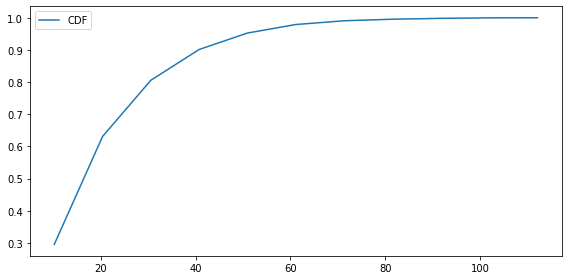

In [ ]:
# def plotCDF(data_1d) :

plt.rcParams["figure.figsize"] = [8  , 4]
plt.rcParams["figure.autolayout"] = True
data1D = np.array(combined_data['distance_district_centre'])
count, bins_count = np.histogram(data1D, bins = 11)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], cdf, label="CDF")

plt.legend()
plt.show()

In [ ]:
# combined_data[((combined_data['distance_district_centre'] > 15.7) & (combined_data['distance_district_centre']<=26.6))]
# combined_data[combined_data['distance_district_centre'] > 26.6]

#Number of elements in each bin
#102670 - 3 bins
#77002 - 4 bins

In [ ]:
# distance - qcut 3 bins
# Categories (3, interval[float64]): [(0.0313, 11.06] < (11.06, 21.898] < (21.898, 112.079]]
102665, 102673, 102673

# distance  - 3 bins
# 11.1, 21.7 

#distance - 4 bins
# 9.1, 15.7, 26.6

In [ ]:
def adi_count_table(df, year, dist_range, equal = 0, change = 0, year2 = 2011, index_values = list(range(4, 13)), devRangeGiven = 0):
  final_count_list = []
  final_percent_list = []
  mean_list = []
  std_dev_list = []
  vill_count = []

  if devRangeGiven == 0 :
    index_values = sorted(list(index_values))

  for adi in index_values :

    adi_count_list = []
    adi_percent_list = []
    col_name = ''
    if change == 0:
      col_name = 'ADI_'+year
    else:
      col_name = 'change_'+year+'_'+year2

    if devRangeGiven == 1 :
      adiInitial = adi[0]
      spreadAdi = adi[1]
      temp = df[((df[col_name] >= adiInitial) & (df[col_name] < (adiInitial+spreadAdi)))]
      temp = temp.sample(frac = 0.10)
    else :
      temp = df[df[col_name] == adi]

    mean_list.append(round(temp['distance_district_centre'].mean(), 2))
    std_dev_list.append(round(temp['distance_district_centre'].std(), 2))
    tot_villages = len(temp)
    vill_count.append(tot_villages)
    if equal == 0 :
      for ele in dist_range:
        start_dist = ele[0]
        spread = ele[1]
        length = len(temp[(temp['distance_district_centre'] >= start_dist) & (temp['distance_district_centre'] < start_dist + spread)])

        if length != 0 :
          adi_count_list.append(length)
          adi_percent_list.append(round(length/tot_villages,2))

        else:
          adi_count_list.append(0)
          adi_percent_list.append(0)


    else :
      t = equal
      for i in range(0, 113, equal):
        length = len(temp[(temp['distance_district_centre'] >= t-equal) & (temp['distance_district_centre'] < t)])

        if length != 0 :
          adi_count_list.append(length)
          adi_percent_list.append(round(length/tot_villages, 2))

        else:
          adi_count_list.append(0)
          adi_percent_list.append(0)

        t+=equal

    final_count_list.append(adi_count_list)
    final_percent_list.append(adi_percent_list)

  return final_count_list, final_percent_list, mean_list, std_dev_list, vill_count

In [ ]:
def return_df(list_2d, dist_range, mean_list, std_dev_list, equal = 0, vill_count_list = [], index_values = list(range(4, 13)), devRangeGiven = 0) :
  column_values = []
  if equal == 0:
    for ele in dist_range:
      column_values.append(str(ele[0])+' to ' + str(ele[0]+ele[1]))
  else :
    for i in range(0, 113, equal):
      column_values.append(str(i) + ' to ' + str(i+equal))

  if devRangeGiven == 0 :
    index_values = sorted(list(index_values))
  else :
    index_values = ['Low Development', 'Medium Development', 'High Development']
  # creating the dataframe
  final_df = pd.DataFrame(data = np.array(list_2d), index = index_values, columns = column_values)
  final_df['Mean (distances)'] = mean_list
  final_df['std dev'] = std_dev_list
  if len(vill_count_list) != 0:
    final_df['Total Villages'] = vill_count_list


  return final_df  

In [ ]:
# dist_range = [(0, 19), (19, 22), (41, 72)]
dist_range = [(0, 11,1), (11.1, 10.6), (21.7, 91.3)]
# 9.1, 15.7, 26.6
# dist_range = [(0, 9.1), (9.1, 6.6), (15.7, 10.9), (26.6, 86.4)]
index_value = [(4, 2), (6, 3), (9, 4)]
count_list, percent_list, mean_list, std_dev_list, vill_count_list = adi_count_table(combined_data, '2019', dist_range, index_values = index_value, devRangeGiven = 1)
percent_df_2001 = return_df(percent_list, dist_range,  mean_list, std_dev_list, index_values = index_value, devRangeGiven=1)
percent_df_2001

,0 to 11,11.1 to 21.7,21.7 to 113.0,Mean (distances),std dev
Low Development,0.20,0.28,0.51,26.38,17.89
Medium Development,0.34,0.35,0.31,18.70,13.63
High Development,0.55,0.31,0.13,12.84,10.76


In [ ]:
count_list
# percent_list
# vill_count_list

[[1412, 1945, 3540], [6828, 6996, 6280], [2047, 1156, 488]]

In [ ]:
percent_list

[[0.2, 0.28, 0.51], [0.34, 0.35, 0.31], [0.55, 0.31, 0.13]]

In [ ]:
vill_count_list

[6914, 20171, 3716]

In [ ]:
y1 = count_list[2][0]
y2 = count_list[0][0]
n1 = vill_count_list[2]
n2 = vill_count_list[0]

p = (y1 + y2)/(n1 + n2)
z = (percent_list[2][0] - percent_list[0][0])/sqrt(p*(1-p)*((1/n1) + (1/n2)))
z

36.72586847965913

In [ ]:
y1 = count_list[2][0]
y2 = count_list[1][0]
n1 = vill_count_list[2]
n2 = vill_count_list[1]

p = (y1 + y2)/(n1 + n2)
z = (percent_list[2][0] - percent_list[1][0])/sqrt(p*(1-p)*((1/n1) + (1/n2)))
z

24.344351393543104

#P( development level | closer to the distance district centre)

In [ ]:
ls /content/drive/MyDrive/

MyDrive/


In [ ]:
new_df = pickle.load(open('/content/drive/MyDrive/Scripts_and_Data_Transfer/Latest_script_Data_for_hyothesis_testing_March_02_2022/final_combined_without_temporal_correction_arch2_predicted_ADI_for_2001_2019_ground_truth_ADI_2011_variables_predicted_from_arch2_pop_sc_st_lit_village_data.pkl', 'rb'))
new_df

,2001_cc_code,VILL_CODE_2001,DIST_CODE_2001,STATE_CODE_2001,VILL_CODE_2011,DIST_CODE_2011,STATE_CODE_2011,distance_district_centre,dc_score_none_none_old,inverted_dist,...,FC_2011,ASSET_2011,LIT_2011,MSW_2011,BF_2019,FC_2019,MSW_2019,ASSET_2019,LIT_2019,ADI_2019
index_col_village_code_2011,,,,,,,,,,,,,,,,,,,,,
27378,301000100000500,00000500,1,3,27378,35,3,6.111495,0.407427,0.163626,...,1,3,3,3,1,3,3,3,3,13
27379,301000100000600,00000600,1,3,27379,35,3,4.878376,0.658831,0.204986,...,1,3,3,3,1,3,3,3,3,13
27380,301000100000700,00000700,1,3,27380,35,3,9.103092,0.080571,0.109853,...,1,3,3,3,1,3,3,3,3,13
27381,301000100000800,00000800,1,3,27381,35,3,6.777262,0.309724,0.147552,...,1,3,3,3,1,1,3,3,3,11
27382,301000100000900,00000900,1,3,27382,35,3,6.786058,0.308561,0.147361,...,1,3,3,3,1,3,3,3,3,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644661,3310000700779700,00779700,10,33,644661,633,33,2.643310,1.712385,0.378314,...,3,3,3,3,3,3,3,3,2,14
644682,3310000700781800,00781800,10,33,644682,633,33,2.493440,1.850601,0.401052,...,3,3,3,3,1,3,3,3,2,12
644683,3310000700781900,00781900,10,33,644683,633,33,3.325585,1.240612,0.300699,...,3,3,3,3,3,3,3,3,2,14


In [16]:
old_df = pickle.load(open('/content/drive/MyDrive/final_data/combined_data_final_different_population.pickle', 'rb'))
old_df

,BF_2011,FC_2011,MSW_2011,ASSET_2011,2001_cc_code,ADI_2011,BF_2001,FC_2001,MSW_2001,ASSET_2001,...,inverted_dist_and_std_scalar,total_population_2001,total_population_2011,ADI_2019,ASSET_2019,MSW_2019,FC_2019,BF_2019,rate_of_population_growth_2001_to_2011,total_population_2019
2011_code,,,,,,,,,,,,,,,,,,,,,
27378,1,1,3,3,301000100000500,8,1.0,1.0,2.0,1.0,...,0.407427,766.0,852.0,7.0,2.0,3.0,1.0,1.0,0.112272,947.0
27379,1,1,3,3,301000100000600,8,1.0,1.0,1.0,2.0,...,0.658831,730.0,780.0,10.0,2.0,3.0,3.0,2.0,0.068493,833.0
27380,1,1,3,3,301000100000700,8,1.0,1.0,1.0,1.0,...,0.080571,2104.0,2502.0,7.0,2.0,3.0,1.0,1.0,0.189163,2975.0
27381,1,1,3,3,301000100000800,8,1.0,1.0,1.0,2.0,...,0.309724,3014.0,1887.0,11.0,2.0,3.0,3.0,3.0,-0.373922,1181.0
27382,1,1,3,3,301000100000900,8,1.0,1.0,2.0,2.0,...,0.308561,461.0,2233.0,10.0,2.0,3.0,3.0,2.0,3.843818,10816.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644661,1,3,3,3,3310000700779700,10,1.0,3.0,3.0,3.0,...,1.712385,1365.0,1291.0,7.0,2.0,3.0,1.0,1.0,-0.054212,1221.0
644682,3,3,3,3,3310000700781800,12,1.0,3.0,3.0,3.0,...,1.850601,2054.0,8089.0,9.0,2.0,3.0,3.0,1.0,2.938169,31855.0
644683,3,3,3,3,3310000700781900,12,3.0,3.0,3.0,3.0,...,1.240612,2388.0,3992.0,9.0,2.0,3.0,3.0,1.0,0.671692,6673.0


In [18]:
print(len(old_df.columns))
old_df.columns

30


Index(['BF_2011', 'FC_2011', 'MSW_2011', 'ASSET_2011', '2001_cc_code',
       'ADI_2011', 'BF_2001', 'FC_2001', 'MSW_2001', 'ASSET_2001',
       'VILL_CODE_2001', 'DIST_CODE_2001', 'VILL_CODE_2011', 'DIST_CODE_2011',
       'STATE_CODE_2001', 'STATE_CODE_2011', 'ADI_2001',
       'distance_district_centre', 'dc_score_none_none_old', 'inverted_dist',
       'inverted_dist_and_std_scalar', 'total_population_2001',
       'total_population_2011', 'ADI_2019', 'ASSET_2019', 'MSW_2019',
       'FC_2019', 'BF_2019', 'rate_of_population_growth_2001_to_2011',
       'total_population_2019'],
      dtype='object')

In [ ]:
(set(new_df.columns).difference(set(old_df.columns)))

{'F_ILL_2011',
 'F_LIT_2011',
 'LIT_2001',
 'LIT_2011',
 'LIT_2019',
 'M_ILL_2011',
 'M_LIT_2011',
 'P_ILL_2011',
 'P_LIT_2011',
 'P_SC_2001',
 'P_SC_2011',
 'P_ST_2001',
 'P_ST_2011',
 'literacy_percent_2011'}

In [ ]:
new_df[old_df.columns]

,BF_2011,FC_2011,MSW_2011,ASSET_2011,2001_cc_code,ADI_2011,BF_2001,FC_2001,MSW_2001,ASSET_2001,...,inverted_dist_and_std_scalar,total_population_2001,total_population_2011,ADI_2019,ASSET_2019,MSW_2019,FC_2019,BF_2019,rate_of_population_growth_2001_to_2011,total_population_2019
index_col_village_code_2011,,,,,,,,,,,,,,,,,,,,,
27378,1,1,3,3,301000100000500,11,1,1,1,2,...,0.407427,766.0,852.0,13,3,3,3,1,0.112272,947.0
27379,1,1,3,3,301000100000600,11,1,1,1,2,...,0.658831,730.0,780.0,13,3,3,3,1,0.068493,833.0
27380,1,1,3,3,301000100000700,11,1,1,1,2,...,0.080571,2104.0,2502.0,13,3,3,3,1,0.189163,2975.0
27381,1,1,3,3,301000100000800,11,1,1,1,2,...,0.309724,3014.0,1887.0,11,3,3,1,1,-0.373922,1181.0
27382,1,1,3,3,301000100000900,11,1,1,1,2,...,0.308561,461.0,2233.0,13,3,3,3,1,3.843818,10816.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644661,1,3,3,3,3310000700779700,13,1,1,3,3,...,1.712385,1365.0,1291.0,14,3,3,3,3,-0.054212,1221.0
644682,3,3,3,3,3310000700781800,15,1,1,3,2,...,1.850601,2054.0,8089.0,12,3,3,3,1,2.938169,31855.0
644683,3,3,3,3,3310000700781900,15,1,1,3,3,...,1.240612,2388.0,3992.0,14,3,3,3,3,0.671692,6673.0


In [32]:
def readDataAndGetSateData():
  #combined_data = pickle.load(open('/content/drive/MyDrive/Scripts_and_Data_Transfer/5.ADI_Analysis/final_data/combined_data_temporary_unverified_pop.pickle','rb'))

  # in mtp Drive 
  #combined_data = pickle.load(open('/content/drive/MyDrive/final_data/combined_data_temporary_unverified_pop.pickle','rb'))
  #drop rows where atleast one column value in Nan or not there

  # now use only for future purpose has all combined data with different population
  # combined_data = pickle.load(open('/content/drive/MyDrive/final_data/combined_data_final_different_population.pickle','rb'))
  new_df = pickle.load(open('/content/drive/MyDrive/Scripts_and_Data_Transfer/Latest_script_Data_for_hyothesis_testing_March_02_2022/final_combined_without_temporal_correction_arch2_predicted_ADI_for_2001_2019_ground_truth_ADI_2011_variables_predicted_from_arch2_pop_sc_st_lit_village_data.pkl', 'rb'))
  old_df = pickle.load(open('/content/drive/MyDrive/final_data/combined_data_final_different_population.pickle','rb'))
  combined_data = new_df.copy()[['BF_2011', 'FC_2011', 'MSW_2011', 'ASSET_2011', '2001_cc_code',
       'ADI_2011', 'BF_2001', 'FC_2001', 'MSW_2001', 'ASSET_2001',
       'VILL_CODE_2001', 'DIST_CODE_2001', 'VILL_CODE_2011', 'DIST_CODE_2011',
       'STATE_CODE_2001', 'STATE_CODE_2011', 'ADI_2001', 'dc_score_none_none_old', 'inverted_dist',
       'inverted_dist_and_std_scalar', 'total_population_2001',
       'total_population_2011', 'ADI_2019', 'ASSET_2019', 'MSW_2019',
       'FC_2019', 'BF_2019', 'rate_of_population_growth_2001_to_2011',
       'total_population_2019', 'distance_district_centre_2001', 'distance_district_centre_2011',
        'distance_district_centre_2019']]

  combined_data = combined_data.dropna()

  combined_data["STATE_CODE_2011"] = combined_data["STATE_CODE_2011"].astype(np.int64)
  combined_data["DIST_CODE_2011"] = combined_data["DIST_CODE_2011"].astype(np.int64)
  combined_data["STATE_CODE_2001"] = combined_data["STATE_CODE_2001"].astype(np.int64)
  combined_data["DIST_CODE_2001"] = combined_data["DIST_CODE_2001"].astype(np.int64)

 

  return combined_data

In [33]:
combined_data = readDataAndGetSateData()
combined_data

,BF_2011,FC_2011,MSW_2011,ASSET_2011,2001_cc_code,ADI_2011,BF_2001,FC_2001,MSW_2001,ASSET_2001,...,ADI_2019,ASSET_2019,MSW_2019,FC_2019,BF_2019,rate_of_population_growth_2001_to_2011,total_population_2019,distance_district_centre_2001,distance_district_centre_2011,distance_district_centre_2019
index_col_village_code_2011,,,,,,,,,,,,,,,,,,,,,
27378,1,1,3,3,301000100000500,11,1,1,1,2,...,13,3,3,3,1,0.112272,947.0,18.486986,12.649933,5.206159
27379,1,1,3,3,301000100000600,11,1,1,1,2,...,13,3,3,3,1,0.068493,833.0,18.362553,14.572395,4.918317
27380,1,1,3,3,301000100000700,11,1,1,1,2,...,13,3,3,3,1,0.189163,2975.0,15.550183,13.711089,4.686912
27381,1,1,3,3,301000100000800,11,1,1,1,2,...,11,3,3,1,1,-0.373922,1181.0,16.427983,15.224204,6.789658
27382,1,1,3,3,301000100000900,11,1,1,1,2,...,13,3,3,3,1,3.843818,10816.0,16.081710,16.919512,6.719902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644661,1,3,3,3,3310000700779700,13,1,1,3,3,...,14,3,3,3,3,-0.054212,1221.0,7.767874,8.165768,2.633434
644682,3,3,3,3,3310000700781800,15,1,1,3,2,...,12,3,3,3,1,2.938169,31855.0,2.064558,2.626164,2.619559
644683,3,3,3,3,3310000700781900,15,1,1,3,3,...,14,3,3,3,3,0.671692,6673.0,3.449624,3.731796,3.281726


In [34]:
combined_data['change_2001_2011'] = combined_data['ADI_2011'] - combined_data['ADI_2001']
combined_data['change_2011_2019'] = combined_data['ADI_2019'] - combined_data['ADI_2011']

In [35]:
combined_data

,BF_2011,FC_2011,MSW_2011,ASSET_2011,2001_cc_code,ADI_2011,BF_2001,FC_2001,MSW_2001,ASSET_2001,...,MSW_2019,FC_2019,BF_2019,rate_of_population_growth_2001_to_2011,total_population_2019,distance_district_centre_2001,distance_district_centre_2011,distance_district_centre_2019,change_2001_2011,change_2011_2019
index_col_village_code_2011,,,,,,,,,,,,,,,,,,,,,
27378,1,1,3,3,301000100000500,11,1,1,1,2,...,3,3,1,0.112272,947.0,18.486986,12.649933,5.206159,4,2
27379,1,1,3,3,301000100000600,11,1,1,1,2,...,3,3,1,0.068493,833.0,18.362553,14.572395,4.918317,4,2
27380,1,1,3,3,301000100000700,11,1,1,1,2,...,3,3,1,0.189163,2975.0,15.550183,13.711089,4.686912,4,2
27381,1,1,3,3,301000100000800,11,1,1,1,2,...,3,1,1,-0.373922,1181.0,16.427983,15.224204,6.789658,4,0
27382,1,1,3,3,301000100000900,11,1,1,1,2,...,3,3,1,3.843818,10816.0,16.081710,16.919512,6.719902,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644661,1,3,3,3,3310000700779700,13,1,1,3,3,...,3,3,3,-0.054212,1221.0,7.767874,8.165768,2.633434,3,1
644682,3,3,3,3,3310000700781800,15,1,1,3,2,...,3,3,1,2.938169,31855.0,2.064558,2.626164,2.619559,6,-3
644683,3,3,3,3,3310000700781900,15,1,1,3,3,...,3,3,3,0.671692,6673.0,3.449624,3.731796,3.281726,5,-1


In [36]:
def adi_count_table(df, year, dist_range, equal = 0, change = 0, year2 = 2011, index_values = list(range(4, 13)), devRangeGiven = 0):
  final_count_list = []
  final_percent_list = []
  mean_list = []
  std_dev_list = []
  vill_count = []

  if devRangeGiven == 0 :
    index_values = sorted(list(index_values))


  if change == 0:
    col_name = 'ADI_'+year
  else:
    col_name = 'change_'+year+'_'+year2


  if equal == 0 :
    for dist in dist_range :
      start_dist = dist[0]
      spread = dist[1]
      dist_count_list  = []
      dist_percent_list = []
      temp = df[(df['distance_district_centre'] > start_dist) & (df['distance_district_centre'] <= start_dist + spread)]
      # temp = temp.sample(frac = 0.10)

      # mean_list.append(round(temp[col_name].mean(), 2))
      # std_dev_list.append(round(temp[col_name].std(), 2))
      mean_list.append(temp[col_name].mean())
      std_dev_list.append(temp[col_name].std())
      tot_villages = len(temp)
      vill_count.append(tot_villages)

      for adi in index_values :

        if devRangeGiven == 1 :
          adiInitial = adi[0]
          spreadAdi = adi[1]
          temp_adi = temp[((temp[col_name] >= adiInitial) & (temp[col_name] < (adiInitial+spreadAdi)))]
        else :
          temp_adi = temp[temp[col_name] == adi]

        length = len(temp_adi)
        
        if length != 0 :
          dist_count_list.append(length)
          dist_percent_list.append(length/tot_villages)

        else:
          dist_count_list.append(0)
          dist_percent_list.append(0)

      final_count_list.append(dist_count_list)
      final_percent_list.append(dist_percent_list)
    
  return final_count_list, final_percent_list, mean_list, std_dev_list, vill_count
  
  # for adi in index_values :

  #   adi_count_list = []
  #   adi_percent_list = []
  #   col_name = ''
  #   if change == 0:
  #     col_name = 'ADI_'+year
  #   else:
  #     col_name = 'change_'+year+'_'+year2

  #   if devRangeGiven == 1 :
  #     adiInitial = adi[0]
  #     spreadAdi = adi[1]
  #     temp = df[((df[col_name] >= adiInitial) & (df[col_name] < (adiInitial+spreadAdi)))]
  #     temp = temp.sample(frac = 0.10)
  #   else :
  #     temp = df[df[col_name] == adi]

  #   mean_list.append(round(temp['distance_district_centre'].mean(), 2))
  #   std_dev_list.append(round(temp['distance_district_centre'].std(), 2))
  #   tot_villages = len(temp)
  #   vill_count.append(tot_villages)
  #   if equal == 0 :
  #     for ele in dist_range:
  #       start_dist = ele[0]
  #       spread = ele[1]
  #       length = len(temp[(temp['distance_district_centre'] >= start_dist) & (temp['distance_district_centre'] < start_dist + spread)])

  #       if length != 0 :
  #         adi_count_list.append(length)
  #         adi_percent_list.append(round(length/tot_villages,2))

  #       else:
  #         adi_count_list.append(0)
  #         adi_percent_list.append(0)


  #   else :
  #     t = equal
  #     for i in range(0, 113, equal):
  #       length = len(temp[(temp['distance_district_centre'] >= t-equal) & (temp['distance_district_centre'] < t)])

  #       if length != 0 :
  #         adi_count_list.append(length)
  #         adi_percent_list.append(round(length/tot_villages, 2))

  #       else:
  #         adi_count_list.append(0)
  #         adi_percent_list.append(0)

  #       t+=equal

  #   final_count_list.append(adi_count_list)
  #   final_percent_list.append(adi_percent_list)

  # return final_count_list, final_percent_list, mean_list, std_dev_list, vill_count

In [37]:
def return_df(list_2d, dist_range, mean_list, std_dev_list, equal = 0, change = 0, vill_count_list = [], index_values = list(range(4, 13)), devRangeGiven = 0) :
  column_values = ['Low Development', 'Medium Development', 'High Development']
  index_list = []
  column_list = []
  if equal == 0:
    for ele in dist_range:
      index_list.append(str(ele[0])+' to ' + str(ele[0]+ele[1]))
  else :
    for i in range(0, 113, equal):
      index_list.append(str(i) + ' to ' + str(i+equal))

  if devRangeGiven == 0 :
    column_values = sorted(list(index_values))
  else :
    if change == 0 :
      for i in range(len(index_values)) :
        column_list.append(column_values[i])
    else :
      # column_list = ['Negative change', 'no change', 'Positive change']
      column_list = ['low change', 'high change']

  # column_values = ['Low Development', 'Medium Development', 'High Development']
  # creating the dataframe
  final_df = pd.DataFrame(data = np.array(list_2d), index = index_list, columns = column_list)
  final_df['Mean (ADI)'] = mean_list
  final_df['std dev'] = std_dev_list
  if len(vill_count_list) != 0:
    final_df['Total Villages'] = vill_count_list


  return final_df  

In [49]:
# Categories (3, interval[float64, right]): [(0.029599999999999998, 14.474] < (14.474, 25.185] < (25.185, 132.769]]
# Categories (3, interval[float64, right]): [(0.020499999999999997, 13.697] < (13.697, 24.059] < (24.059, 133.673]]
# Categories (3, interval[float64, right]): [(0.00777, 8.101] < (8.101, 14.977] < (14.977, 110.767]]
year = '2019'
combined_data1 = combined_data.copy()[['BF_2011', 'FC_2011', 'MSW_2011', 'ASSET_2011', '2001_cc_code',
       'ADI_2011', 'BF_2001', 'FC_2001', 'MSW_2001', 'ASSET_2001',
       'VILL_CODE_2001', 'DIST_CODE_2001', 'VILL_CODE_2011', 'DIST_CODE_2011',
       'STATE_CODE_2001', 'STATE_CODE_2011', 'ADI_2001',
       'distance_district_centre_'+ year, 'dc_score_none_none_old', 'inverted_dist',
       'inverted_dist_and_std_scalar', 'total_population_2001',
       'total_population_2011', 'ADI_2019', 'ASSET_2019', 'MSW_2019',
       'FC_2019', 'BF_2019', 'rate_of_population_growth_2001_to_2011',
       'total_population_2019', 'change_2001_2011',	'change_2011_2019']]

combined_data1.rename(columns = {'distance_district_centre_'+ year : 'distance_district_centre'}, inplace = True)


if year == '2001' :
  dist_range = [(0, 14.474), (14.474, 10.711), (25.185, 107.584)]
elif year == '2011' :
  dist_range = [(0, 13.697), (13.697, 10.362), (24.059, 109.614)]
else : 
  dist_range = [(0, 8.101), (8.101, 6.876), (14.977, 95.79)]


In [50]:
# dist_range = [(0, 19), (19, 22), (41, 72)]
# 9.1, 15.7, 26.6
# dist_range = [(0, 9.1), (9.1, 6.6), (15.7, 10.9), (26.6, 86.4)]

# Categories (3, interval[float64]): [(0.0313, 11.06] < (11.06, 21.898] < (21.898, 112.079]]
# dist_range = [(0, 11.06), (11.06, 10.838), (21.898, 95)]

# Categories (3, interval[float64]):(0.0313, 11.163] < (11.163, 22.028] < (22.028, 112.079]
# dist_range = [(0.0313, 11.163), (11.163, 10.865), (22.028, 95)]
index_value = [(5, 4), (9, 2), (11, 5)]
# index_value = [(4, 3), (7, 2), (9, 4)]
# index_value = [(4, 3), (7, 6)]
count_list, percent_list, mean_list, std_dev_list, vill_count_list = adi_count_table(combined_data1, year, dist_range, index_values = index_value, devRangeGiven = 1)
percent_df_2001 = return_df(percent_list, dist_range,  mean_list, std_dev_list, index_values = index_value, devRangeGiven=1)
percent_df_2001

,Low Development,Medium Development,High Development,Mean (ADI),std dev
0 to 8.101,0.373061,0.462241,0.164697,9.188122,1.902539
8.101 to 14.977,0.453877,0.444223,0.101900,8.737805,1.693589
14.977 to 110.76700000000001,0.582248,0.381097,0.036655,8.094024,1.474174


In [51]:
count_list

[[37984, 47064, 16769], [46216, 45233, 10376], [59281, 38801, 3732]]

In [52]:
np.round(np.array(percent_list), 5).tolist()

[[0.37306, 0.46224, 0.1647],
 [0.45388, 0.44422, 0.1019],
 [0.58225, 0.3811, 0.03666]]

In [53]:
vill_count_list

[101817, 101825, 101814]

In [55]:
#Z-tests
hyp1 = 'close'
hyp2 = 'medium'

hypa = 'high'

ind_dict = {'close' : 0, 'medium' : 1, 'far' : 2}
ind_dict2 = {'low' : 0, 'medium' : 1, 'high' : 2}
i1 = ind_dict[hyp1]
i2 = ind_dict[hyp2]

ia = ind_dict2[hypa]

print(i1, i2)
print(ia)

n1 = vill_count_list[i1]
n2 = vill_count_list[i2]

y1 = count_list[i1][ia]
y2 = count_list[i2][ia]

p = (y1 + y2)/(n1 + n2)

p1 = percent_list[i1][ia]
p2 = percent_list[i2][ia]

print('n1, n2 : ', n1, n2)
print('y1, y2 : ', y1, y2)
print('p1, p2 : ', p1, p2)
print('p : ', p)


Z = (p1 - p2)/(math.sqrt((p*(1-p)*((1/n1)+(1/n2)))))
print('Z stat : ', Z)

0 1
2
n1, n2 :  101817 101825
y1, y2 :  16769 10376
p1, p2 :  0.16469744738108566 0.10190031917505524
p :  0.1332976497971931
Z stat :  41.68667254784572


In [56]:
combined_data

,BF_2011,FC_2011,MSW_2011,ASSET_2011,2001_cc_code,ADI_2011,BF_2001,FC_2001,MSW_2001,ASSET_2001,...,MSW_2019,FC_2019,BF_2019,rate_of_population_growth_2001_to_2011,total_population_2019,distance_district_centre_2001,distance_district_centre_2011,distance_district_centre_2019,change_2001_2011,change_2011_2019
index_col_village_code_2011,,,,,,,,,,,,,,,,,,,,,
27378,1,1,3,3,301000100000500,11,1,1,1,2,...,3,3,1,0.112272,947.0,18.486986,12.649933,5.206159,4,2
27379,1,1,3,3,301000100000600,11,1,1,1,2,...,3,3,1,0.068493,833.0,18.362553,14.572395,4.918317,4,2
27380,1,1,3,3,301000100000700,11,1,1,1,2,...,3,3,1,0.189163,2975.0,15.550183,13.711089,4.686912,4,2
27381,1,1,3,3,301000100000800,11,1,1,1,2,...,3,1,1,-0.373922,1181.0,16.427983,15.224204,6.789658,4,0
27382,1,1,3,3,301000100000900,11,1,1,1,2,...,3,3,1,3.843818,10816.0,16.081710,16.919512,6.719902,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644661,1,3,3,3,3310000700779700,13,1,1,3,3,...,3,3,3,-0.054212,1221.0,7.767874,8.165768,2.633434,3,1
644682,3,3,3,3,3310000700781800,15,1,1,3,2,...,3,3,1,2.938169,31855.0,2.064558,2.626164,2.619559,6,-3
644683,3,3,3,3,3310000700781900,15,1,1,3,3,...,3,3,3,0.671692,6673.0,3.449624,3.731796,3.281726,5,-1


In [57]:
positive_change_df = combined_data.copy()
positive_change_df_range1 = positive_change_df.copy()[positive_change_df['change_2001_2011'].gt(0)]
positive_change_df_range2 = positive_change_df.copy()[positive_change_df['change_2011_2019'].gt(0)]
positive_change_df = positive_change_df.copy()[positive_change_df['change_2001_2011'].gt(0) & positive_change_df['change_2011_2019'].gt(0)]


In [58]:
print(len(positive_change_df_range1), len(positive_change_df_range2), len(positive_change_df))

151927 106005 21562


In [59]:
set(positive_change_df_range1['change_2001_2011'])

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10}

In [60]:
# pd.qcut(positive_change_df_range1.change_2001_2011, 3, duplicates='drop')

#OLD
# range2 count= <69479, 46134>
# range1 count= <57567, 72207>

#NEW
# range2 count= <87280, 18725>
# range1 count= <100487, 51440>

# threshold = 2 , range1 <_, 27.510>
# threshold = 2 , range2 <_, 13.825>

positive_change_df_range1[positive_change_df_range1.change_2001_2011 <= 2]
# positive_change_df_range2[positive_change_df_range2.change_2011_2019 <= 2]

,BF_2011,FC_2011,MSW_2011,ASSET_2011,2001_cc_code,ADI_2011,BF_2001,FC_2001,MSW_2001,ASSET_2001,...,MSW_2019,FC_2019,BF_2019,rate_of_population_growth_2001_to_2011,total_population_2019,distance_district_centre_2001,distance_district_centre_2011,distance_district_centre_2019,change_2001_2011,change_2011_2019
index_col_village_code_2011,,,,,,,,,,,,,,,,,,,,,
27405,1,3,3,3,301000200003200,13,1,3,2,3,...,2,3,3,0.120000,156.0,3.177078,10.903073,2.913744,1,1
27410,3,3,3,3,301000200003700,15,3,3,2,3,...,3,3,3,-0.141347,558.0,3.946371,9.117097,2.427387,1,0
27415,1,1,3,3,301000200004400,11,1,1,3,3,...,3,3,3,0.190587,2439.0,4.157708,8.391259,3.151953,1,4
27416,1,2,3,3,301000200004500,12,1,1,3,3,...,3,3,3,0.261789,1958.0,3.020739,9.550569,3.235828,2,3
27417,1,3,3,3,301000200004600,13,1,1,3,3,...,3,3,3,0.045386,722.0,5.703859,7.155905,2.771443,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644631,1,3,2,3,3310000600776700,12,1,1,3,3,...,3,3,3,0.052281,3325.0,18.749324,12.358481,8.922734,2,2
644639,1,3,3,3,3310000700777500,12,1,1,3,3,...,3,3,1,-0.082119,1272.0,16.412499,15.018867,6.860302,2,0
644641,1,3,3,3,3310000700777700,12,1,1,3,3,...,3,3,1,0.010091,3033.0,13.335101,13.091322,13.907059,1,0


In [ ]:
# 72.48986699955307
# 86.17543009869132


86.17543009869132

In [69]:
year = '2011'
year2 = '2019'

combined_data1 = combined_data.copy()[['BF_2011', 'FC_2011', 'MSW_2011', 'ASSET_2011', '2001_cc_code',
       'ADI_2011', 'BF_2001', 'FC_2001', 'MSW_2001', 'ASSET_2001',
       'VILL_CODE_2001', 'DIST_CODE_2001', 'VILL_CODE_2011', 'DIST_CODE_2011',
       'STATE_CODE_2001', 'STATE_CODE_2011', 'ADI_2001',
       'distance_district_centre_'+ year, 'dc_score_none_none_old', 'inverted_dist',
       'inverted_dist_and_std_scalar', 'total_population_2001',
       'total_population_2011', 'ADI_2019', 'ASSET_2019', 'MSW_2019',
       'FC_2019', 'BF_2019', 'rate_of_population_growth_2001_to_2011',
       'total_population_2019', 'change_2001_2011',	'change_2011_2019']]

combined_data1.rename(columns = {'distance_district_centre_'+ year : 'distance_district_centre'}, inplace = True)
positive_change_df = combined_data1.copy()
positive_change_df_range1 = positive_change_df.copy()[positive_change_df['change_2001_2011'].gt(0)]
positive_change_df_range2 = positive_change_df.copy()[positive_change_df['change_2011_2019'].gt(0)]
positive_change_df = positive_change_df.copy()[positive_change_df['change_2001_2011'].gt(0) & positive_change_df['change_2011_2019'].gt(0)]

if year == '2001' :
  dist_range = [(0, 14.474), (14.474, 10.711), (25.185, 107.584)]
elif year == '2011' :
  dist_range = [(0, 13.697), (13.697, 10.362), (24.059, 109.614)]
else : 
  dist_range = [(0, 8.101), (8.101, 6.876), (14.977, 95.79)]

In [62]:
# dist_range = [(0, 19), (19, 22), (41, 72)]
# 9.1, 15.7, 26.6
# dist_range = [(0, 9.1), (9.1, 6.6), (15.7, 10.9), (26.6, 86.4)]
# dist_range = [(0, 11,1), (11.1, 10.6), (21.7, 91.3)]
# index_value = [(4, 3), (7, 2), (9, 4)]
# index_value = [(4, 3), (7, 6)]
# count_list, percent_list, mean_list, std_dev_list, vill_count_list = adi_count_table(combined_data, '2011', dist_range, index_values = index_value, devRangeGiven = 1)
# percent_df_2001 = return_df(percent_list, dist_range,  mean_list, std_dev_list, index_values = index_value, devRangeGiven=1)
# percent_df_2001

equal = 0
change = 1
# dist_range = [(0, 11.06), (11.06, 10.838), (21.898, 95)]
# dist_range = [(0.0313, 11.163), (11.163, 10.865), (22.028, 95)] -> LATEST
# index_values = [(-8, 8), (0, 1), (1, 8)]
# index_values = [(1, 1), (2, 7)]
# index_values = [(1, 1), (2, 7)]
# index_values = [(1, 2), (2, 7)]
# index_values = [(1, 1), (2,9)]
index_values = [(1, 2), (3,8)]


# index_values = set(positive_change_df[col_name])

# year = '2001'
# year2 = '2011'
col_name = 'change_'+year+'_'+year2

count_list, percent_list, mean_list, std_dev_list, vill_count_list = adi_count_table(positive_change_df_range1, year, dist_range, equal = equal, change = change, year2 = year2, index_values = index_values, devRangeGiven = 1)
positive_change_percent_df_2001_2011 = return_df(percent_list, dist_range,  mean_list, std_dev_list, change = change,  equal = equal, index_values = index_values, devRangeGiven=1)
positive_change_percent_df_2001_2011

,low change,high change,Mean (ADI),std dev
0 to 14.474,0.599676,0.400324,2.535229,1.658781
14.474 to 25.185000000000002,0.675348,0.324652,2.252355,1.475013
25.185 to 132.769,0.716191,0.283809,2.104248,1.382333


In [63]:
count_list

[[32232, 21517], [34049, 16368], [34206, 13555]]

In [64]:
np.round(np.array(percent_list), 5).tolist()

[[0.59968, 0.40032], [0.67535, 0.32465], [0.71619, 0.28381]]

In [65]:
vill_count_list

[53749, 50417, 47761]

In [66]:
sum(vill_count_list)

151927

In [70]:
# dist_range = [(0, 19), (19, 22), (41, 72)]
# 9.1, 15.7, 26.6
# dist_range = [(0, 9.1), (9.1, 6.6), (15.7, 10.9), (26.6, 86.4)]
# dist_range = [(0, 11,1), (11.1, 10.6), (21.7, 91.3)]
# index_value = [(4, 3), (7, 2), (9, 4)]
# index_value = [(4, 3), (7, 6)]
# count_list, percent_list, mean_list, std_dev_list, vill_count_list = adi_count_table(combined_data, '2011', dist_range, index_values = index_value, devRangeGiven = 1)
# percent_df_2001 = return_df(percent_list, dist_range,  mean_list, std_dev_list, index_values = index_value, devRangeGiven=1)
# percent_df_2001

equal = 0
change = 1
# dist_range = [(0, 11.06), (11.06, 10.838), (21.898, 95)]
# dist_range = [(0.0313, 11.163), (11.163, 10.865), (22.028, 95)] -> Latest

# index_values = [(-8, 8), (0, 1), (1, 8)]
# index_values = [(1, 1), (2, 7)]
# index_values = [(1, 2), (2, 9)]
index_values = [(1, 2), (3,8)]

# index_values = set(positive_change_df[col_name])

# year = '2011'
# year2 = '2019'
col_name = 'change_'+year+'_'+year2

count_list, percent_list, mean_list, std_dev_list, vill_count_list = adi_count_table(positive_change_df_range2, year, dist_range, equal = equal, change = change, year2 = year2, index_values = index_values, devRangeGiven = 1)
positive_change_percent_df_2011_2019 = return_df(percent_list, dist_range,  mean_list, std_dev_list, change = change,  equal = equal, index_values = index_values, devRangeGiven=1)
positive_change_percent_df_2011_2019

,low change,high change,Mean (ADI),std dev
0 to 13.697,0.791360,0.208640,1.836582,1.089400
13.697 to 24.058999999999997,0.830487,0.169513,1.718107,0.952546
24.059 to 133.673,0.846937,0.153063,1.662191,0.882063


In [71]:
count_list

[[27404, 7225], [29028, 5925], [30848, 5575]]

In [72]:
np.round(np.array(percent_list), 5).tolist()

[[0.79136, 0.20864], [0.83049, 0.16951], [0.84694, 0.15306]]

In [73]:
vill_count_list

[34629, 34953, 36423]

In [74]:
sum(vill_count_list)

106005

In [76]:
#Z-tests
hyp1 = 'close'
hyp2 = 'medium'

hypa = 'high'

ind_dict = {'close' : 0, 'medium' : 1, 'far' : 2}
ind_dict2 = {'low' : 0, 'high' : 1}
i1 = ind_dict[hyp1]
i2 = ind_dict[hyp2]

ia = ind_dict2[hypa]

print(i1, i2)
print(ia)

n1 = vill_count_list[i1]
n2 = vill_count_list[i2]

y1 = count_list[i1][ia]
y2 = count_list[i2][ia]

p = (y1 + y2)/(n1 + n2)

p1 = percent_list[i1][ia]
p2 = percent_list[i2][ia]

print('n1, n2 : ', n1, n2)
print('y1, y2 : ', y1, y2)
print('p1, p2 : ', p1, p2)
print('p : ', p)


Z = (p1 - p2)/(math.sqrt((p*(1-p)*((1/n1)+(1/n2)))))
print('Z stat : ', Z)

0 1
1
n1, n2 :  34629 34953
y1, y2 :  7225 5925
p1, p2 :  0.20864015709376535 0.16951334649386318
p :  0.18898565721019803
Z stat :  13.181338347799613
